<a href="https://colab.research.google.com/github/MavielS/classification-biens-de-consommation/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problématique** <br>
Peut-on catégoriser les produits de ce dataset avec leur image et leur description ? <br>

**Objectif du projet**: <br>
Votre mission est de réaliser une première **étude de faisabilité** d'un moteur de classification d'articles basé sur une image et une description pour **l'automatisation de l'attribution de la catégorie de l'article**. <br>

Vous analyserez le jeu de données en réalisant un **prétraitement** des images et des descriptions des produits, une **réduction de dimension**, puis un **clustering**. <br>
Les résultats du clustering seront présentés sous la forme d’une **représentation en deux dimensions** à déterminer, qui illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

**Objectif du notebook**: <br>

Ce notebook se concentre uniquement sur l'extraction de features du texte. On utilisera comme données brutes la description et le nom du produit que l'on nettoiera à l'aide de différents outils classiques de NLP (Lemmatization, suppression de stop-words...) <br>
Après avoir vectorizé nos textes (BoW et Tf-Idf), on effectuera un clustering. La qualité de cette segmentation sera évaluée grâce au score ARI (Adjusted Rand Index).<br> <br>
Ensuite, l'on analysera la séparation des clusters à l'aide d'un TSNE. <br>

Enfin, l'on conclura sur la faisabilité puis on ouvrira en montrant que les outils de classification supervisée sont bien plus adaptés dans notre situation (présence de labels) à l'aide d'une Random Forest. <br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Récupération-des-datas" data-toc-modified-id="Récupération-des-datas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Récupération des datas</a></span></li><li><span><a href="#Exploitation-de-la-colonne-product_category_tree" data-toc-modified-id="Exploitation-de-la-colonne-product_category_tree-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploitation de la colonne product_category_tree</a></span><ul class="toc-item"><li><span><a href="#Catégories-primaires" data-toc-modified-id="Catégories-primaires-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Catégories primaires</a></span></li><li><span><a href="#Catégories-secondaires" data-toc-modified-id="Catégories-secondaires-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Catégories secondaires</a></span></li></ul></li><li><span><a href="#K-means-avec-description-du-produit" data-toc-modified-id="K-means-avec-description-du-produit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-means avec description du produit</a></span><ul class="toc-item"><li><span><a href="#Création-et-nettoyage-du-dataset" data-toc-modified-id="Création-et-nettoyage-du-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Création et nettoyage du dataset</a></span><ul class="toc-item"><li><span><a href="#Suppression-du-bruit" data-toc-modified-id="Suppression-du-bruit-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Suppression du bruit</a></span></li><li><span><a href="#Normalisation" data-toc-modified-id="Normalisation-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Normalisation</a></span></li><li><span><a href="#Stop-Words" data-toc-modified-id="Stop-Words-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Stop-Words</a></span></li></ul></li><li><span><a href="#BoW" data-toc-modified-id="BoW-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>BoW</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Vectorization</a></span></li><li><span><a href="#Evaluation-BoW" data-toc-modified-id="Evaluation-BoW-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Evaluation BoW</a></span></li><li><span><a href="#Analyse-des-clusters" data-toc-modified-id="Analyse-des-clusters-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Analyse des clusters</a></span></li></ul></li><li><span><a href="#Second-K-Means:-TF-IDF" data-toc-modified-id="Second-K-Means:-TF-IDF-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Second K-Means: TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Vectorization</a></span></li><li><span><a href="#Evaluation-tf-idf" data-toc-modified-id="Evaluation-tf-idf-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Evaluation tf-idf</a></span><ul class="toc-item"><li><span><a href="#T-SNE" data-toc-modified-id="T-SNE-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>T-SNE</a></span></li><li><span><a href="#Quels-sont-les-mots-les-plus-déterminants-pour-chaque-cluster-?" data-toc-modified-id="Quels-sont-les-mots-les-plus-déterminants-pour-chaque-cluster-?-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>Quels sont les mots les plus déterminants pour chaque cluster ?</a></span></li><li><span><a href="#Quels-sont-les-mots-les-moins-déterminants-dans-ce-modèle-?" data-toc-modified-id="Quels-sont-les-mots-les-moins-déterminants-dans-ce-modèle-?-3.3.2.3"><span class="toc-item-num">3.3.2.3&nbsp;&nbsp;</span>Quels sont les mots les moins déterminants dans ce modèle ?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#K-Means-avec-description-et-nom-du-produit" data-toc-modified-id="K-Means-avec-description-et-nom-du-produit-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-Means avec description et nom du produit</a></span><ul class="toc-item"><li><span><a href="#Création-et-nettoyage-du-dataset" data-toc-modified-id="Création-et-nettoyage-du-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Création et nettoyage du dataset</a></span></li><li><span><a href="#BoW" data-toc-modified-id="BoW-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>BoW</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Vectorization</a></span></li><li><span><a href="#Evaluation-BoW" data-toc-modified-id="Evaluation-BoW-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Evaluation BoW</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-clusters" data-toc-modified-id="Analyse-des-clusters-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>Analyse des clusters</a></span></li></ul></li></ul></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Vectorization</a></span></li><li><span><a href="#Evaluation-tf-idf" data-toc-modified-id="Evaluation-tf-idf-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Evaluation tf-idf</a></span><ul class="toc-item"><li><span><a href="#T-SNE" data-toc-modified-id="T-SNE-4.3.2.1"><span class="toc-item-num">4.3.2.1&nbsp;&nbsp;</span>T-SNE</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#K-Means-avec-description-+-nom-du-produit-+-ACP" data-toc-modified-id="K-Means-avec-description-+-nom-du-produit-+-ACP-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>K-Means avec description + nom du produit + ACP</a></span><ul class="toc-item"><li><span><a href="#BoW" data-toc-modified-id="BoW-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BoW</a></span><ul class="toc-item"><li><span><a href="#Réduction-de-dimension-et-affiche-des-nouveaux-scores-ARIs" data-toc-modified-id="Réduction-de-dimension-et-affiche-des-nouveaux-scores-ARIs-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Réduction de dimension et affiche des nouveaux scores ARIs</a></span></li><li><span><a href="#Analyse-du-meilleur-score" data-toc-modified-id="Analyse-du-meilleur-score-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Analyse du meilleur score</a></span></li></ul></li><li><span><a href="#Tf-Idf" data-toc-modified-id="Tf-Idf-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Tf-Idf</a></span><ul class="toc-item"><li><span><a href="#Réduction-de-dimension-et-affiche-des-nouveaux-scores-ARIs" data-toc-modified-id="Réduction-de-dimension-et-affiche-des-nouveaux-scores-ARIs-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Réduction de dimension et affiche des nouveaux scores ARIs</a></span></li><li><span><a href="#Analyse-du-meilleur-score" data-toc-modified-id="Analyse-du-meilleur-score-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Analyse du meilleur score</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Création-et-nettoyage-du-dataset" data-toc-modified-id="Création-et-nettoyage-du-dataset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Création et nettoyage du dataset</a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#BoW" data-toc-modified-id="BoW-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>BoW</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Analyse-du-résultat" data-toc-modified-id="Analyse-du-résultat-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Analyse du résultat</a></span><ul class="toc-item"><li><span><a href="#Mots-les-plus-déterminants" data-toc-modified-id="Mots-les-plus-déterminants-6.3.3.1"><span class="toc-item-num">6.3.3.1&nbsp;&nbsp;</span>Mots les plus déterminants</a></span></li><li><span><a href="#Catégories-les-mieux/moins-biens-prédites" data-toc-modified-id="Catégories-les-mieux/moins-biens-prédites-6.3.3.2"><span class="toc-item-num">6.3.3.2&nbsp;&nbsp;</span>Catégories les mieux/moins biens prédites</a></span></li></ul></li></ul></li><li><span><a href="#Tf-Idf" data-toc-modified-id="Tf-Idf-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Tf-Idf</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Analyse-du-résultat" data-toc-modified-id="Analyse-du-résultat-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span>Analyse du résultat</a></span><ul class="toc-item"><li><span><a href="#Mots-les-plus-déterminants" data-toc-modified-id="Mots-les-plus-déterminants-6.4.3.1"><span class="toc-item-num">6.4.3.1&nbsp;&nbsp;</span>Mots les plus déterminants</a></span></li><li><span><a href="#Catégories-les-mieux/moins-biens-prédites" data-toc-modified-id="Catégories-les-mieux/moins-biens-prédites-6.4.3.2"><span class="toc-item-num">6.4.3.2&nbsp;&nbsp;</span>Catégories les mieux/moins biens prédites</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from dataprep.eda import create_report
from dataprep.clean import clean_text
from dataprep.eda import plot_missing

import nltk
import string
from nltk.corpus import wordnet
# from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from p6_utils import *

from datetime import datetime
# Fichier perso
import exploration as ex
from p6_utils import *

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

pd.set_option('plotting.backend', 'plotly')
pd.set_option("display.min_rows", 10)
pd.set_option("display.max_columns", 50)
pd.set_option("max_colwidth", 100)

%reload_ext autoreload
%autoreload 2

# Récupération des datas

In [2]:
df_desc = pd.read_csv('data\description_product.csv')

In [3]:
df_desc.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                                           product_url  \
0  http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdg...   
1           http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2  http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt...   
4  http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v...   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                 product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstrac...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cot...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotto...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL ...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Flo...   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   
3  BDSEJT9UQWHDUBH4        2699.0            1299.0   
4  BDSEJTHNGWVGWWQU        2599.0             698.0   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                           description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...   
2  Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...   
3  Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...   
4  Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                                                                                product_specifications  
0  {"product_specification"=>[{"k

In [4]:
report = create_report(df_desc)

  0%|          | 0/1526 [00:00<?, ?it/s]

In [5]:
report.show_browser()

Je ne garde que les variables contenant des informations utiles à la classification

In [8]:
var_useful = [   
#                  'uniq_id',
#                  'crawl_timestamp', # Quand l'info a été récup
#                  'product_url', # URl de la photo (qui n'existe plus)
                 'product_name', 
                 'product_category_tree', # Dans quelles catégories ces produits sont rangés
#                  'pid', # PID = Product ID ?
                 'retail_price',
#                  'discounted_price', # Prix en solde: Pas intéréssant pour notre classification
                 'image', # Nous permet de lier nos descriptions aux images
#                  'is_FK_Advantage_product',
                 'description',
#                  'product_rating',
#                  'overall_rating',
#                  'brand', 
                 'product_specifications'
             ]

# Exploitation de la colonne product_category_tree

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [5]:
def separate_categ(s: str):
    to_return = s.replace('[', '').replace(']', '').replace('&', 'and').replace('"','')
    to_return = to_return.split('>>')
    for ind in range(len(to_return)):
        to_return[ind] = to_return[ind].strip()
    to_return = ','.join(to_return[:])
    to_return = to_return.lower()
    
    to_return = to_return.replace('&', 'and')
    return to_return

separate_categ('oui >> non >> OK >> pas ok')

'oui,non,ok,pas ok'

In [6]:
to_clean = df_desc.product_category_tree.apply(func=separate_categ)
to_clean

0       home furnishing,curtains and accessories,curtains,elegance polyester multicolor abstract eyelet ...
1       baby care,baby bath and skin,baby bath towels,sathiyas baby bath towels,sathiyas cotton bath tow...
2       baby care,baby bath and skin,baby bath towels,eurospa baby bath towels,eurospa cotton terry face...
3       home furnishing,bed linen,bedsheets,santosh royal fashion bedsheets,santosh royal fashion cotton...
4       home furnishing,bed linen,bedsheets,jaipur print bedsheets,jaipur print cotton floral king sized...
                                                       ...                                                 
1045                                           baby care,baby and kids gifts,stickers,oren empower stickers
1046                                             baby care,baby and kids gifts,stickers,wallmantra stickers
1047                                               baby care,baby and kids gifts,stickers,uberlyfe stickers
1048                        

In [7]:
to_clean.isna().sum()

0

## Catégories primaires

J'observe que product_category_tree décompose en de nombreuses sous-catégories, jusqu'à arriver au nom du produit. <br>
Pour l'instant, je ne vais m'intéresser qu'à la 'root' de cet arbre et je vais compter combien de catégories 'primaires' différentes j'ai dans ce dataset. <b>

In [8]:
main_categories = to_clean.apply(func= lambda x: x.split(',')[0])

In [9]:
re.findall(('[^,]+'), main_categories[0])

['home furnishing']

In [10]:
vectorizer = CountVectorizer(token_pattern='[^,]+')
X = vectorizer.fit_transform(main_categories.values)

In [11]:
cv_dataframe=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
cv_dataframe

baby care  beauty and personal care  computers  \
0             0                         0          0   
1             1                         0          0   
2             1                         0          0   
3             0                         0          0   
4             0                         0          0   
...         ...                       ...        ...   
1045          1                         0          0   
1046          1                         0          0   
1047          1                         0          0   
1048          1                         0          0   
1049          1                         0          0   

      home decor and festive needs  home furnishing  kitchen and dining  \
0                                0                1                   0   
1                                0                0                   0   
2                                0                0                   0   
3                                0                1                   0   
4                                0                1                   0   
...                            ...              ...                 ...   
1045                             0                0                   0   
1046                             0                0                   0   
1047                             0                0                   0   
1048                             0                0                   0   
1049                             0                0                   0   

      watches  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1045        0  
1046        0  
1047        0  
1048        0  
1049        0  

[1050 rows x 7 columns]

In [12]:
cv_dataframe.sum().sort_values(ascending=False)

baby care                       150
beauty and personal care        150
computers                       150
home decor and festive needs    150
home furnishing                 150
kitchen and dining              150
watches                         150
dtype: int64

J'ai **7 catégories** primaires avec chacune 150 produits, ces clusters sont équilibrés.

## Catégories secondaires

In [13]:
secondary_categories = to_clean.apply(func=lambda x: x.split(',')[1]) # Je récupère les 2 premières catégories
# secondary_categories = secondary_categories.apply(func= lambda x: ','.join(x)) # J'assemble en une chaine de caractères ces 2 catégories
secondary_categories

0       curtains and accessories
1             baby bath and skin
2             baby bath and skin
3                      bed linen
4                      bed linen
                  ...           
1045         baby and kids gifts
1046         baby and kids gifts
1047         baby and kids gifts
1048         baby and kids gifts
1049         baby and kids gifts
Name: product_category_tree, Length: 1050, dtype: object

In [14]:
re.findall(('[^,]+'), secondary_categories[0])

['curtains and accessories']

In [15]:
vectorizer = CountVectorizer(token_pattern='[^,]+')
X = vectorizer.fit_transform(secondary_categories.values)

In [16]:
cv_dataframe=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
cv_dataframe

baby and kids gifts  baby bath and skin  baby bedding  baby grooming  \
0                       0                   0             0              0   
1                       0                   1             0              0   
2                       0                   1             0              0   
3                       0                   0             0              0   
4                       0                   0             0              0   
...                   ...                 ...           ...            ...   
1045                    1                   0             0              0   
1046                    1                   0             0              0   
1047                    1                   0             0              0   
1048                    1                   0             0              0   
1049                    1                   0             0              0   

      bar and glassware  bath and spa  bath linen  beauty accessories  \
0                     0             0           0                   0   
1                     0             0           0                   0   
2                     0             0           0                   0   
3                     0             0           0                   0   
4                     0             0           0                   0   
...                 ...           ...         ...                 ...   
1045                  0             0           0                   0   
1046                  0             0           0                   0   
1047                  0             0           0                   0   
1048                  0             0           0                   0   
1049                  0             0           0                   0   

      bed linen  body and skin care  candles and fragrances  clocks  \
0             0                   0                       0       0   
1             0                   0                       0       0   
2             0                   0                       0       0   
3             1                   0                       0       0   
4             1                   0                       0       0   
...         ...                 ...                     ...     ...   
1045          0                   0                       0       0   
1046          0                   0                       0       0   
1047          0                   0                       0       0   
1048          0                   0                       0       0   
1049          0                   0                       0       0   

      coffee mugs  combos and kits  computer components  computer peripherals  \
0               0                0                    0                     0   
1               0                0                    0                     0   
2               0                0                    0                     0   
3               0                0                    0                     0   
4               0                0                    0                     0   
...           ...              ...                  ...                   ...   
1045            0                0                    0                     0   
1046            0                0                    0                     0   
1047            0                0                    0                     0   
1048            0                0                    0                     0   
1049            0                0                    0                     0   

      consumables and disposables  containers and bottles  cookware  \
0                               0                       0         0   
1                               0                       0         0   
2                               0                       0         0   
3                               0                       0         0   
4          

In [17]:
cv_dataframe.sum().sort_values(ascending=False)

wrist watches                  149
laptop accessories              87
infant wear                     84
coffee mugs                     74
showpieces                      71
                              ... 
dinnerware and crockery          1
men's grooming                   1
beauty accessories               1
kripa's home furnishing          1
consumables and disposables      1
Length: 62, dtype: int64

Les catégories secondaires sont au nombre de 62. <br>
Je remarque en outre que certains labels n'ont qu'une seule occurence (un seul produit à cette catégorie secondaire) <br>

In [18]:
cv_dataframe.sum()[(cv_dataframe.sum() > 30)].sort_values(ascending=False) # Catégories avec + de 30 occurences

wrist watches         149
laptop accessories     87
infant wear            84
coffee mugs            74
showpieces             71
bed linen              65
fragrances             65
network components     49
dtype: int64

... Ces catégories pourront être considérées plus tard

# K-means avec description du produit

## Création et nettoyage du dataset

### Suppression du bruit

The pipeline for the clean_text() function is the following:

    lowercase: Convert all characters to lowercase.
    remove_digits: Remove numbers.
    remove_urls: Remove URLs.
    remove_punctuation: Remove punctuation marks.
    remove_accents: Remove accent marks.
    remove_whitespace: Remove extra spaces, and tabs and newlines.
    remove_html Remove HTML tags.


In [19]:
custom_pipeline = [
    {"operator": "lowercase"},
    {"operator": "remove_digits"},
    {"operator": "remove_urls"},
    {"operator": "remove_punctuation"},
    {"operator": "remove_accents"},
    {"operator": "remove_whitespace"},
    {"operator": "remove_html"},
]

description = clean_text(df_desc, 'description', pipeline=custom_pipeline).description

In [20]:
description.sample(5)

416    flipkart com buy playboy berlin combo set online only for rs from flipkart com only genuine prod...
708    buy indigocart plain double dohar grey at rs at flipkart com only genuine products free shipping...
624    specifications of oxolloxo solid single breasted casual women s blazer general details pattern s...
660    fabutex polyester black white abstract eyelet window door curtain cm in height pack of \r  price...
240    buy kosher kadhai l for rs online kosher kadhai l at best prices with free shipping cash on deli...
Name: description, dtype: object

### Normalisation

Lemmatisation (Renvoie à la racine du mot)

Quelle librairie utilisée ? <br>
spaCy, ntlk, TextBlob...

In [21]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


lem = WordNetLemmatizer()

sentence = "This is just a test, you have to chill man. You really need to lower your expectations."

# Lemmatization with POS tag
print(" ".join([lem.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))

This be just a test you have to chill man You really need to low your expectation


In [22]:
description = description.apply(func = lambda sentence: " ".join([lem.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))

In [23]:
description.sample(5)

448    key feature of kfactory baby shower cap purple easy bathing for your kid these cap ensure you sh...
275    key feature of babeezworld baby boy s romper fabric cotton brand color blue green babeezworld ba...
134    buy rajesh digital best dad ceramic mug for r online rajesh digital best dad ceramic mug at best...
136    rockmantra fantasy art ceramic mug l price r give a thrill yet fresh start to your day an exclus...
896    rustic india geometric cushion cover pack of cm black price r let s your guest appreciate your f...
Name: description, dtype: object

### Stop-Words

In [24]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text: str, stop_words: list):
    words = [word for word in text.split() if word.lower() not in stop_words]

    return ' '.join(words)

description = description.apply(func=lambda x: remove_stopwords(x, stop_words))

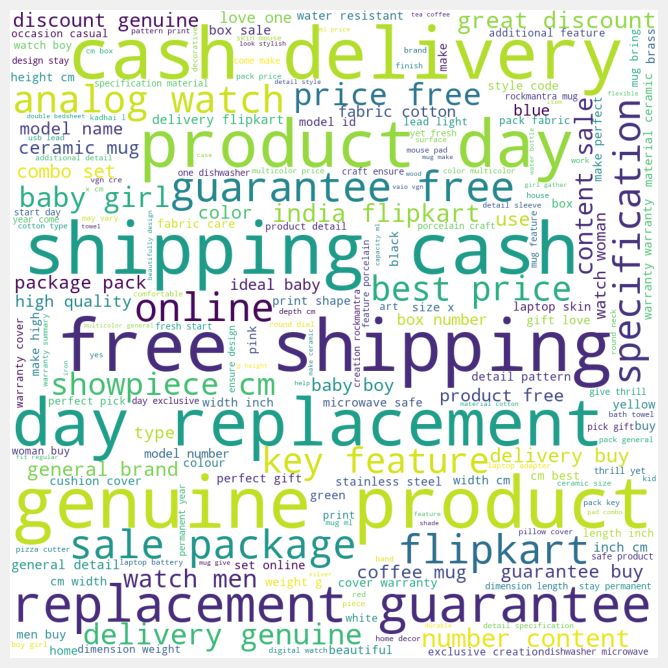

In [25]:
from wordcloud import WordCloud

long_string = ','.join(description.values)
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, width=1000, height=1000, contour_color='steelblue')
wordcloud.generate(long_string)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Je repère des stop-words spécifiques à ce dataset

In [26]:
##Creating a list of custom stopwords
new_words =  ['product', 'free', 'cm', 'buy', 'delivery', 'shipping', 'genuine', 'cash', 'price', 'replacement', 'day', 'flipkart', 'com', 'guarantee', 'feature', 
              'online', 'specification', 'color', 'type', 'material', 'general', 'number', 'brand', 'best', 'key', 'size', 'dimension', 'sale', 'discount', 'pack', 'package', 'box']

stop_words = stop_words.union(new_words)
cleaned_desc = description.apply(func=lambda x: remove_stopwords(x, stop_words))

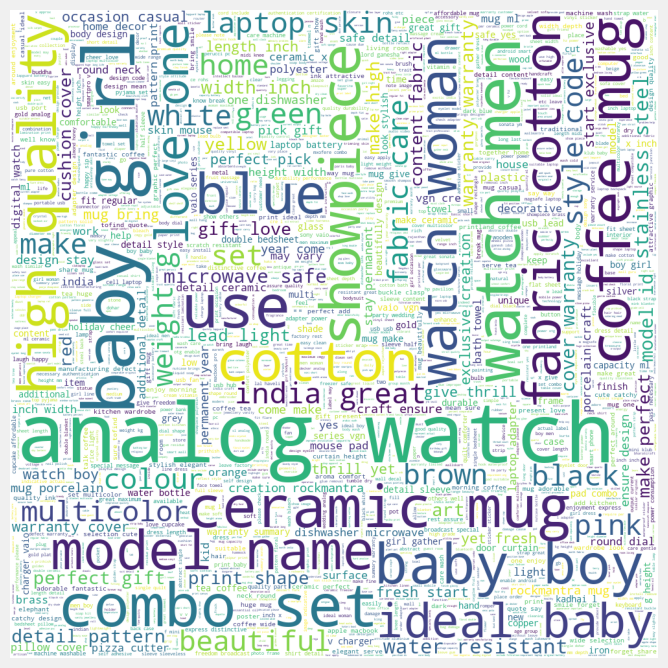

In [27]:
long_string = ','.join(cleaned_desc.values)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, width=1000, height=1000, contour_color='steelblue')
wordcloud.generate(long_string)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

# J'ajoute le true label à mes descriptions cleanés
le = LabelEncoder()

frame = { 'description':cleaned_desc, 'label':le.fit_transform(main_categories)}
true_labels = pd.DataFrame(frame)
true_labels

description  \
0     elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester mul...   
1     sathiyas cotton bath towel bath towel red yellow blue bath towel machine washable yes cotton des...   
2     eurospa cotton terry face towel set small height inch gsm eurospa cotton terry face towel set pi...   
3     santosh royal fashion cotton print king double bedsheet royal bedsheet perfact wedding gift sant...   
4     jaipur print cotton floral king double bedsheet cotton jaipur print cotton floral king double be...   
...                                                                                                   ...   
1045  oren empower extra large self adhesive sticker r double sticker use big wall two piece arrange a...   
1046  wallmantra large vinyl sticker sticker r bring home exclusive piece wall art give home refresh l...   
1047  uberlyfe extra large pigment polyvinyl film import sticker r uberlyfe extra large pigment polyvi...   
1048                    wallmantra medium vinyl sticker sticker r wallmantra medium vinyl sticker sticker   
1049                                          uberlyfe large vinyl sticker r uberlyfe large vinyl sticker   

      label  
0         4  
1         0  
2         0  
3         4  
4         4  
...     ...  
1045      0  
1046      0  
1047      0  
1048      0  
1049      0  

[1050 rows x 2 columns]

## Analyse des vectorizations

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### BoW

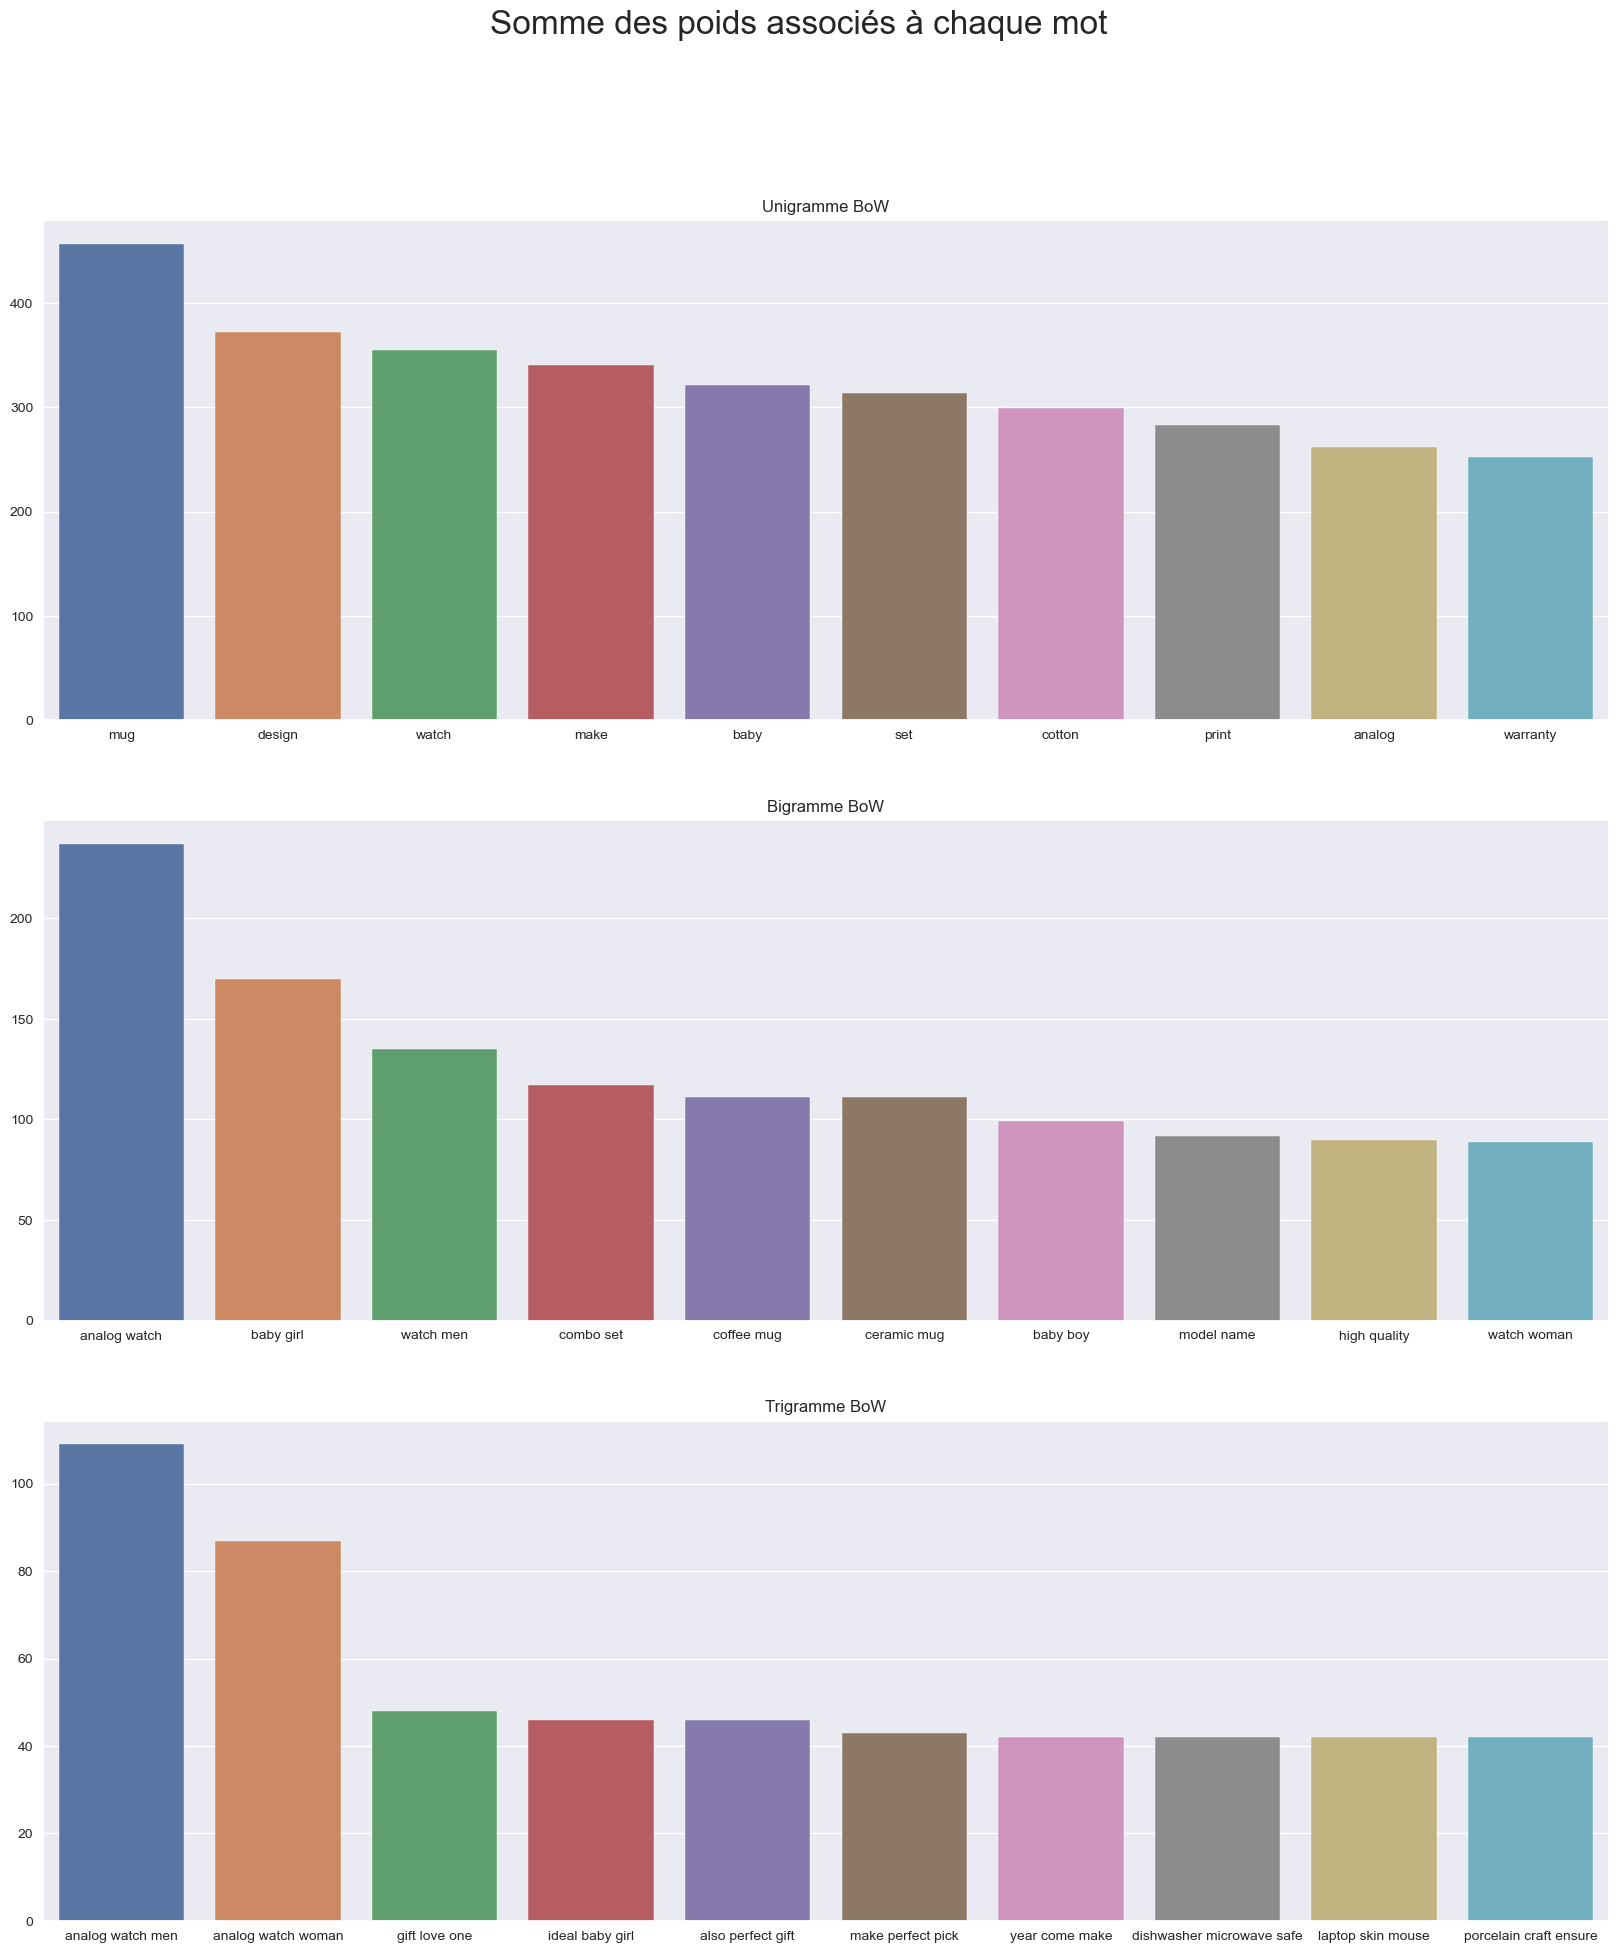

In [31]:
plot_n_gramms(cleaned_desc, CountVectorizer, [(1,1),(2,2),(3,3)], titles=['Unigramme BoW', 'Bigramme BoW', 'Trigramme BoW'])

### Tf-Idf

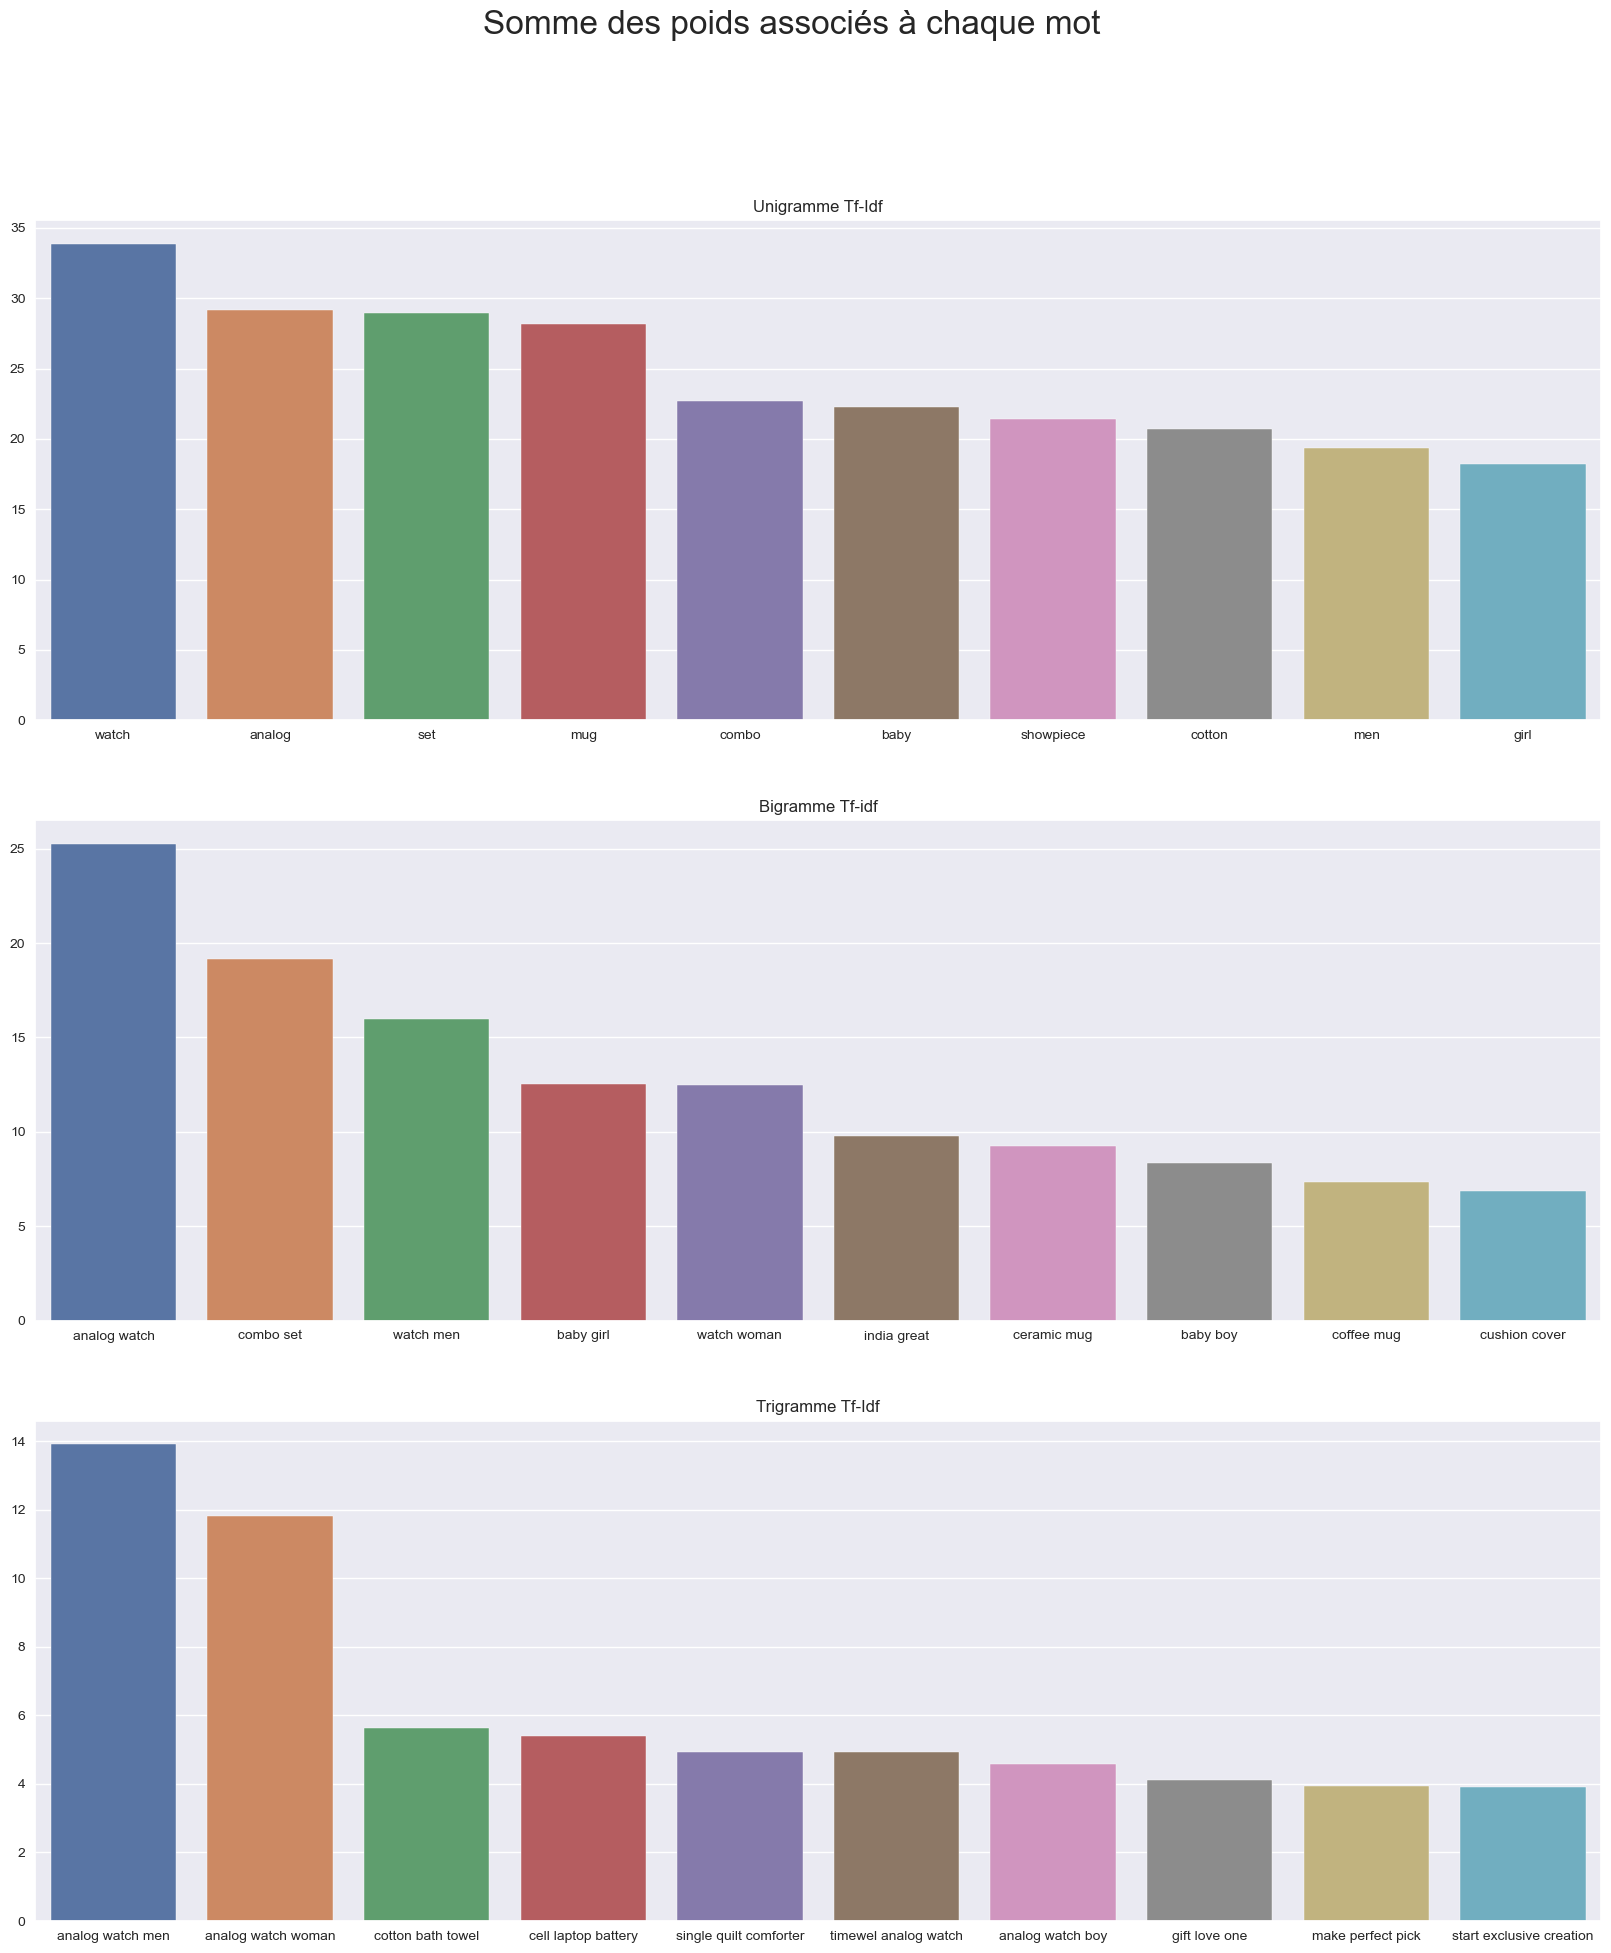

In [51]:
plot_n_gramms(cleaned_desc, TfidfVectorizer, [(1,1),(2,2),(3,3)], titles=['Unigramme Tf-Idf', 'Bigramme Tf-idf', 'Trigramme Tf-Idf'])

## BoW

Ici l'idée est de faire un K-means avec en input le BoW des descriptions des produits. <br>
On considérera le nombre minimal d'occurences de notre BoW comme un hyperparamètre, il conviendra alors de trouver la valeur pour lequel le score ARI est le meilleur.

### Evaluation BoW

---Unigramme---
0 occurences -- (ngramm:(1, 1)) Taille: (1050, 4407), Sparcity: 0.489 %
10 occurences -- (ngramm:(1, 1)) Taille: (1050, 513), Sparcity: 2.755 %
20 occurences -- (ngramm:(1, 1)) Taille: (1050, 227), Sparcity: 4.621 %
30 occurences -- (ngramm:(1, 1)) Taille: (1050, 134), Sparcity: 6.231 %
40 occurences -- (ngramm:(1, 1)) Taille: (1050, 91), Sparcity: 7.628 %
50 occurences -- (ngramm:(1, 1)) Taille: (1050, 72), Sparcity: 8.526 %
60 occurences -- (ngramm:(1, 1)) Taille: (1050, 61), Sparcity: 9.151 %
70 occurences -- (ngramm:(1, 1)) Taille: (1050, 50), Sparcity: 9.808 %
80 occurences -- (ngramm:(1, 1)) Taille: (1050, 37), Sparcity: 10.770 %
90 occurences -- (ngramm:(1, 1)) Taille: (1050, 26), Sparcity: 11.908 %
100 occurences -- (ngramm:(1, 1)) Taille: (1050, 20), Sparcity: 12.686 %
110 occurences -- (ngramm:(1, 1)) Taille: (1050, 14), Sparcity: 13.898 %
120 occurences -- (ngramm:(1, 1)) Taille: (1050, 11), Sparcity: 14.753 %
130 occurences -- (ngramm:(1, 1)) Taille: (1050, 

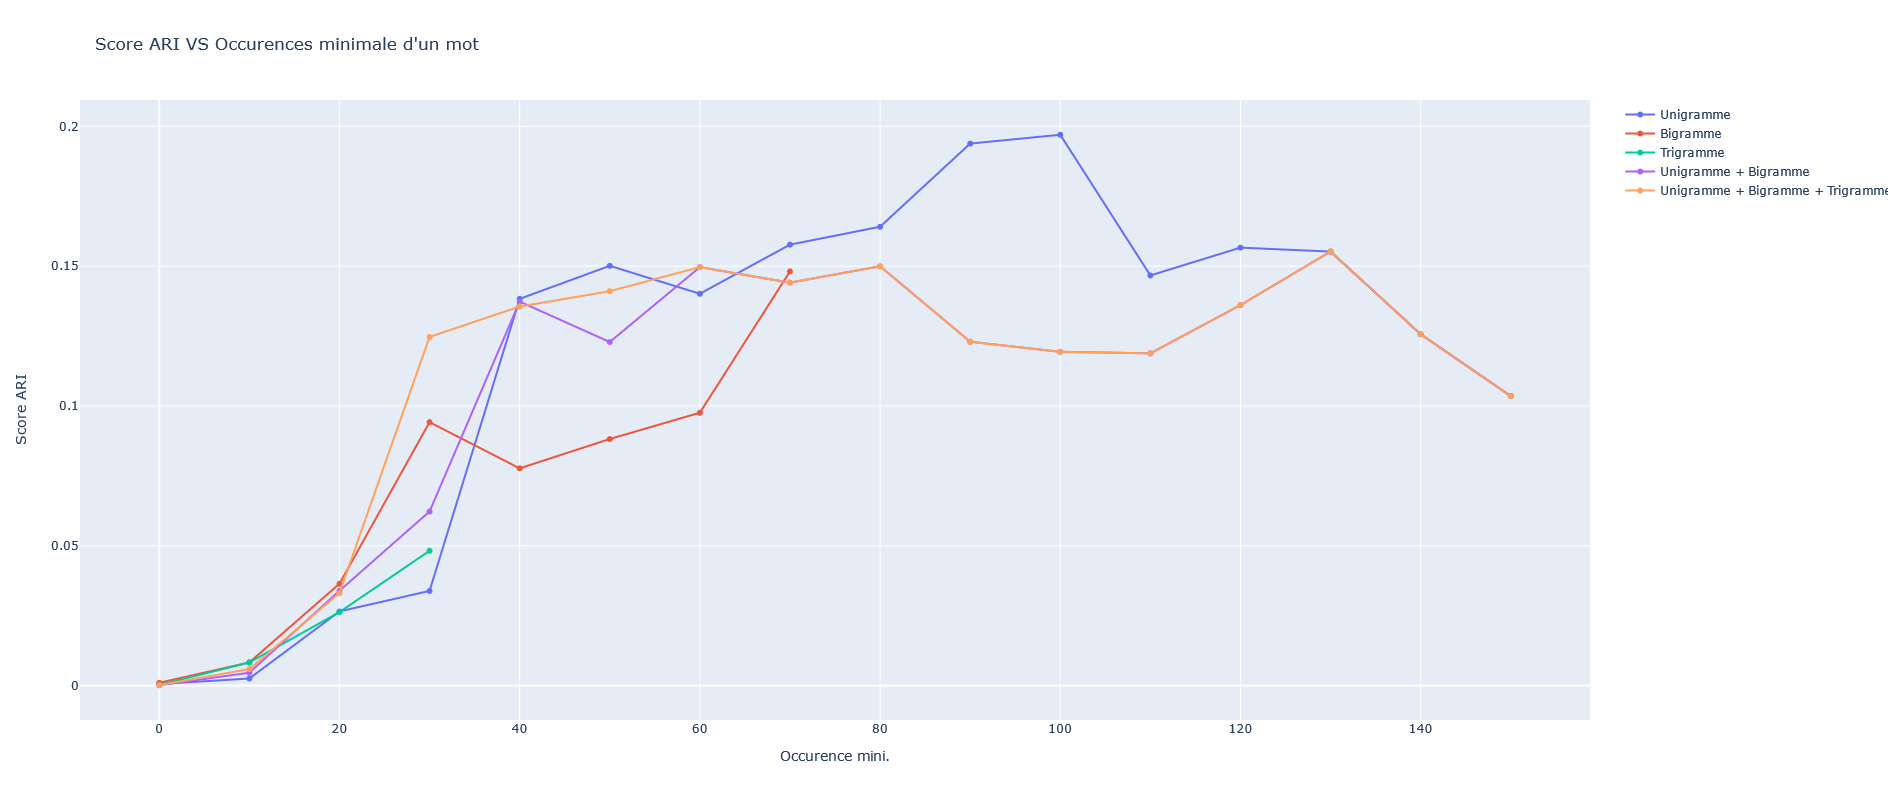

In [38]:
model = KMeans(n_clusters = 7, random_state=42)
vec = CountVectorizer

print('---Unigramme---')
bows, vectorizers = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=True)
print('---Bigramme---')
bows_bi, vectorizers_bi = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=True) 
print('---Trigramme---')
bows_tri, vectorizers_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=True) 
print('---Unigramme + Bigramme---')
bows_both, vectorizers_both = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=True)
print('---Unigramme + Bigramme + Trigramme---')
bows_uni_tri, vectorizers_uni_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=True)

x_range = list(range(0, 160, 10))

plot_all_aris_score([bows, bows_bi, bows_tri, bows_both, bows_uni_tri], true_labels.label, x_value=x_range, model=model, 
                    legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'])

**Unigramme**: A partir de 150 occurences mini, plus de clusters que de mots. <br>
**Bigramme**: A partir de 70 occurences mini. <br>
**Both**: A partir de 150 occurences mini. <br>

Le meilleur jeu d'entrainement est celui composé d'unigramme. <br>
Meilleur ARI score (0,2) atteint avec une occurence de 100 occurences minimum. <br>

### Analyse des clusters

Le jeu de données retenu est le suivant:

In [40]:
kmeans = KMeans(n_clusters = 7, random_state=42)

bows, vectorizers = vectorized_ngrams(data=cleaned_desc, vec=CountVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=False)

best_bow = bows[10].toarray()
best_vectorizer = vectorizers[10]

# Centrage et Réduction
std_scale = StandardScaler().fit(best_bow)
X_scaled = std_scale.transform(best_bow)

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.1969824365963339

In [42]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    102
1     74
2    146
3    562
4     78
5      9
6     79
dtype: int64

##### T-SNE

In [93]:
from sklearn.manifold import TSNE

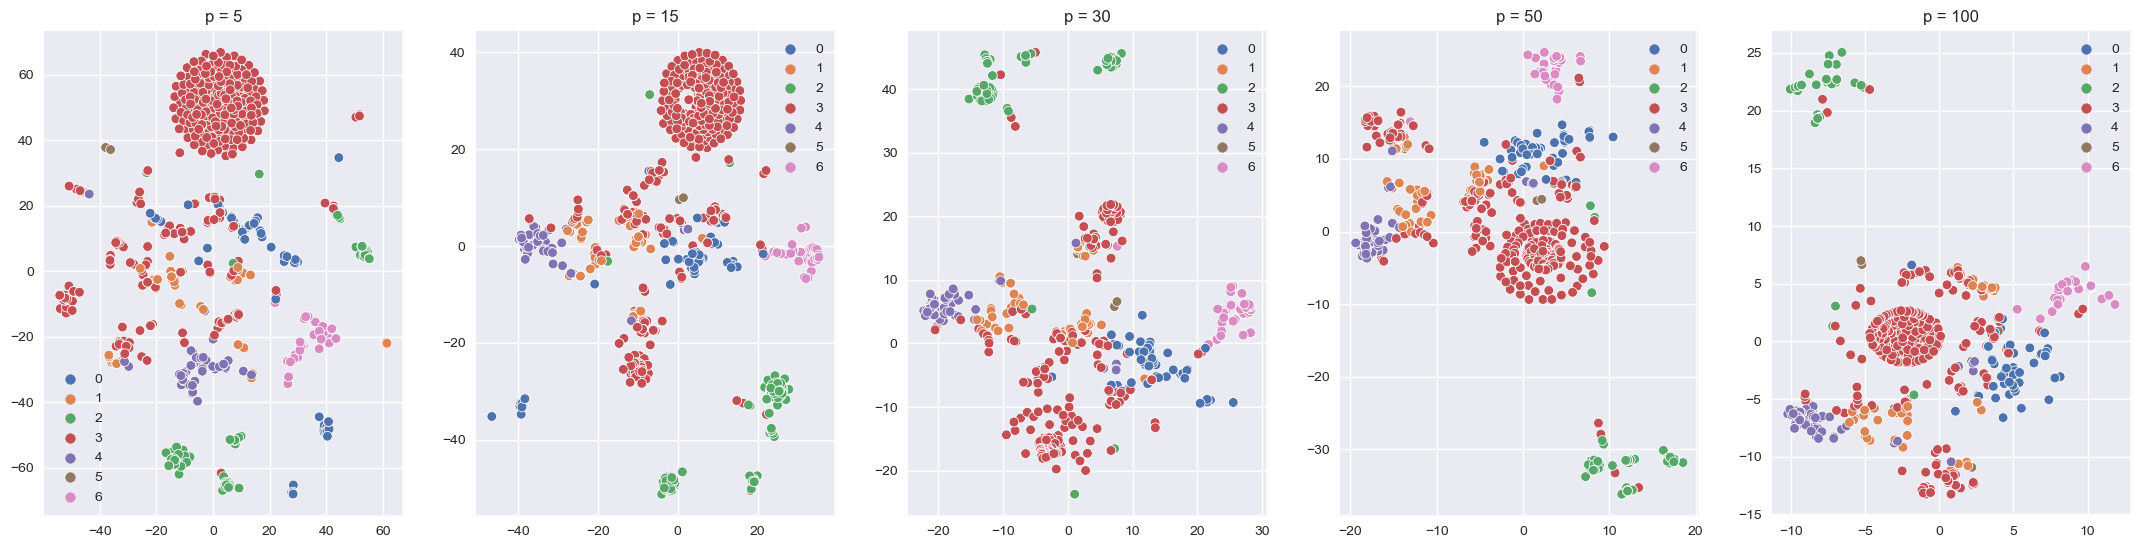

In [95]:
fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_bow)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

##### Quels sont les mots les plus déterminants pour chaque cluster ?

In [97]:
best_df = pd.DataFrame(data = best_bow, columns=best_vectorizer.get_feature_names())
best_df['label'] = kmeans.labels_

top_5_words = []

for label in set(kmeans.labels_):
    top_5_words.append(best_df[best_df.label == label].drop('label', axis=1).sum(axis=0).sort_values(ascending=False)[:5].index.tolist())

top_5_words

[['make', 'design', 'gift', 'quality', 'detail'],
 ['print', 'set', 'cotton', 'design', 'model'],
 ['watch', 'analog', 'great', 'india', 'water'],
 ['set', 'use', 'model', 'design', 'cotton'],
 ['detail', 'fabric', 'cotton', 'print', 'pattern'],
 ['water', 'design', 'use', 'india', 'set'],
 ['showpiece', 'gift', 'model', 'india', 'use']]

##### Quels sont les mots les moins déterminants dans ce modèle ?

In [98]:
from sklearn.tree import DecisionTreeClassifier

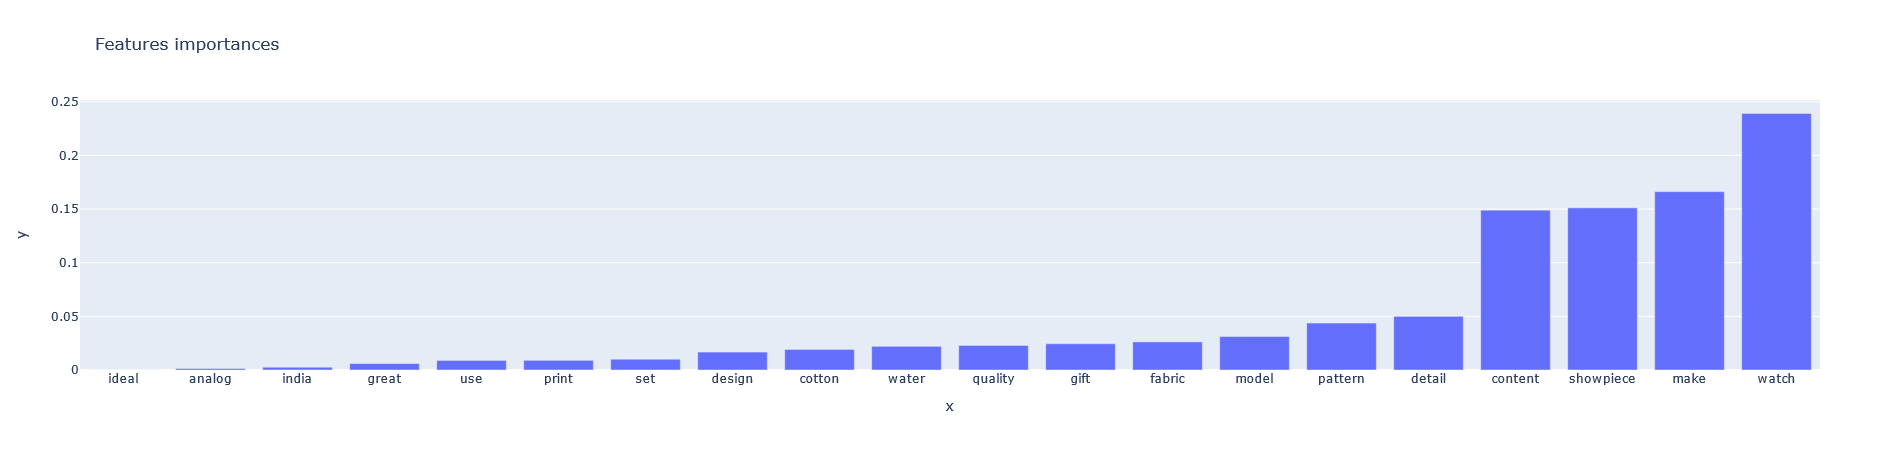

In [99]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(best_bow, kmeans.labels_)

feature_importances = pd.Series(dt.feature_importances_,
                                index = best_vectorizer.get_feature_names(),
                                name='Feature importance')\
                                .sort_values(ascending=True)

px.bar(data_frame=feature_importances, y=feature_importances.values, x=list(feature_importances.index), title='Features importances')

## TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

---

### Evaluation tf-idf

---Unigramme---
0 mots -- (ngramm:(1, 1)) Taille: (1050, 4407), Sparcity: 0.489 %
10 mots -- (ngramm:(1, 1)) Taille: (1050, 513), Sparcity: 2.755 %
20 mots -- (ngramm:(1, 1)) Taille: (1050, 227), Sparcity: 4.621 %
30 mots -- (ngramm:(1, 1)) Taille: (1050, 134), Sparcity: 6.231 %
40 mots -- (ngramm:(1, 1)) Taille: (1050, 91), Sparcity: 7.628 %
50 mots -- (ngramm:(1, 1)) Taille: (1050, 72), Sparcity: 8.526 %
60 mots -- (ngramm:(1, 1)) Taille: (1050, 61), Sparcity: 9.151 %
70 mots -- (ngramm:(1, 1)) Taille: (1050, 50), Sparcity: 9.808 %
80 mots -- (ngramm:(1, 1)) Taille: (1050, 37), Sparcity: 10.770 %
90 mots -- (ngramm:(1, 1)) Taille: (1050, 26), Sparcity: 11.908 %
100 mots -- (ngramm:(1, 1)) Taille: (1050, 20), Sparcity: 12.686 %
110 mots -- (ngramm:(1, 1)) Taille: (1050, 14), Sparcity: 13.898 %
120 mots -- (ngramm:(1, 1)) Taille: (1050, 11), Sparcity: 14.753 %
130 mots -- (ngramm:(1, 1)) Taille: (1050, 10), Sparcity: 15.010 %
140 mots -- (ngramm:(1, 1)) Taille: (1050, 9), Sparcity: 15.

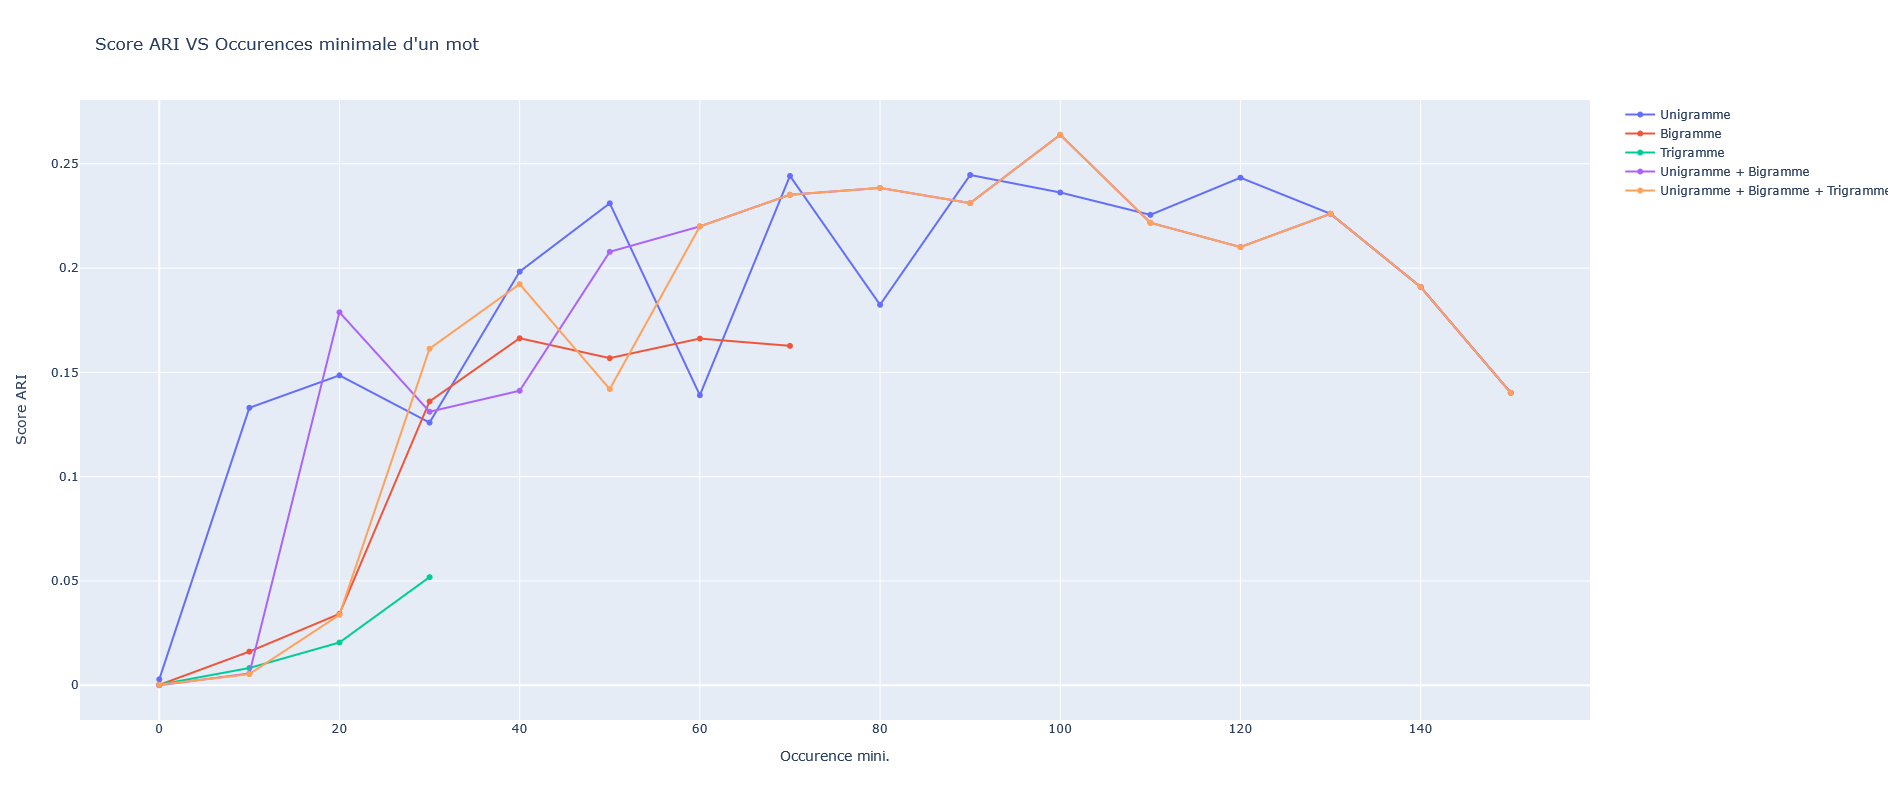

In [52]:
model = KMeans(n_clusters = 7, random_state=42)
vec = TfidfVectorizer

print('---Unigramme---')
tfidf, vectorizers_tfidf = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=True)
print('---Bigramme---')
tfidf_bi, vectorizers_tfidf_bi = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=True) 
print('---Trigramme---')
tfidf_tri, vectorizers_tfidf_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=True) 
print('---Unigramme + Bigramme---')
tfidf_both, vectorizers_tfidf_both = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=True)
print('---Unigramme + Bigramme + Trigramme---')
tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=True)

x_range = list(range(0, 160, 10))

plot_all_aris_score([tfidf, tfidf_bi, tfidf_tri, tfidf_both, tfidf_uni_tri], true_labels.label, x_value=x_range, model=model, 
                    legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'])

Le meilleur jeu d'entrainement est celui composé d'unigramme + bigramme + trigramme. <br>
Meilleur ARI score (0,26) atteint avec une occurence de 100 minimum. <br>

### Analyse des clusters

#### T-SNE

In [53]:
from sklearn.manifold import TSNE

In [101]:
kmeans = KMeans(n_clusters = 7, random_state=42)


tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=cleaned_desc, vec=TfidfVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=False)
best_tfidf = tfidf_uni_tri[10].toarray()
best_vectorizer_tfidf = vectorizers_tfidf_uni_tri[10]

# Centrage et Réduction
std_scale = StandardScaler().fit(best_tfidf)
X_scaled = std_scale.transform(best_tfidf)

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.26391539115301127

In [102]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    111
1     84
2    427
3    152
4     93
5     59
6    124
dtype: int64

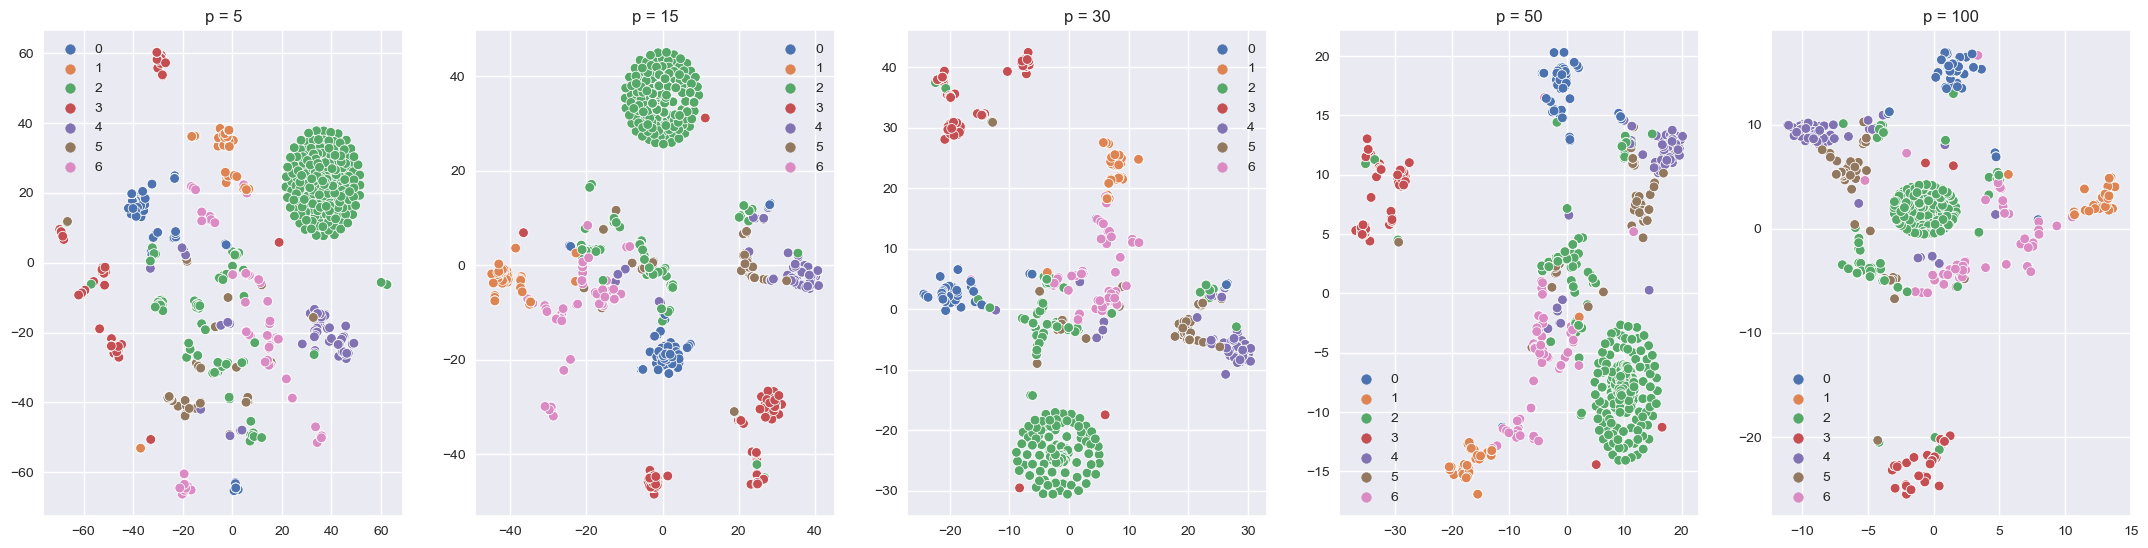

In [103]:
fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_tfidf)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

#### Quels sont les mots les plus déterminants pour chaque cluster ?

In [105]:
best_df = pd.DataFrame(data = best_bow, columns=best_vectorizer.get_feature_names())
best_df['label'] = kmeans.labels_

top_5_words = []

for label in set(kmeans.labels_):
    top_5_words.append(best_df[best_df.label == label].drop('label', axis=1).sum(axis=0).sort_values(ascending=False)[:5].index.tolist())

top_5_words

[['set', 'use', 'cotton', 'model', 'content'],
 ['showpiece', 'gift', 'model', 'india', 'make'],
 ['model', 'design', 'use', 'water', 'cotton'],
 ['watch', 'analog', 'great', 'india', 'water'],
 ['detail', 'fabric', 'cotton', 'pattern', 'ideal'],
 ['print', 'cotton', 'set', 'content', 'model'],
 ['make', 'gift', 'quality', 'design', 'use']]

#### Quels sont les mots les moins déterminants dans ce modèle ?

In [106]:
from sklearn.tree import DecisionTreeClassifier

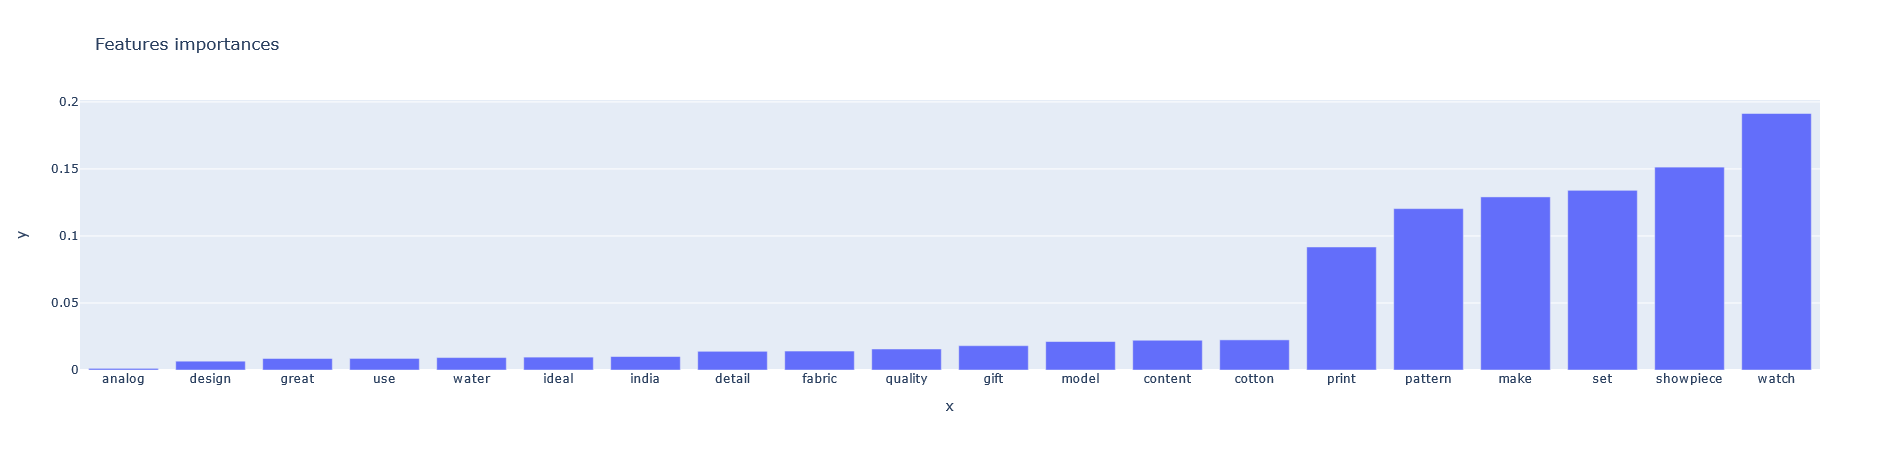

In [107]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(best_bow, kmeans.labels_)

feature_importances = pd.Series(dt.feature_importances_,
                                index = best_vectorizer.get_feature_names(),
                                name='Feature importance')\
                                .sort_values(ascending=True)

px.bar(data_frame=feature_importances, y=feature_importances.values, x=list(feature_importances.index), title='Features importances')

# K-Means avec description et nom du produit

## Création et nettoyage du dataset

In [43]:
# Nouvelle description avec le nom du produit ajouté 
df_desc['description_and_product_name'] = df_desc['product_name'] + ' ' + df_desc['description']

description_and_product_name = clean_text(df_desc, 'description_and_product_name', pipeline=custom_pipeline).description_and_product_name
description_and_product_name = description_and_product_name.apply(func = lambda sentence: " ".join([lem.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))

In [44]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words =  ['product', 'free', 'cm', 'buy', 'delivery', 'shipping', 'genuine', 'cash', 'price', 'replacement', 'day', 'flipkart', 'com', 'guarantee', 'feature', 
              'online', 'specification', 'color', 'type', 'material', 'general', 'number', 'brand', 'best', 'key', 'size', 'dimension', 'sale', 'discount', 'pack', 'package', 'box']

stop_words = stop_words.union(new_words)

cleaned_desc_and_product_name = description_and_product_name.apply(func=lambda x: remove_stopwords(x, stop_words))

## BoW

### Vectorization

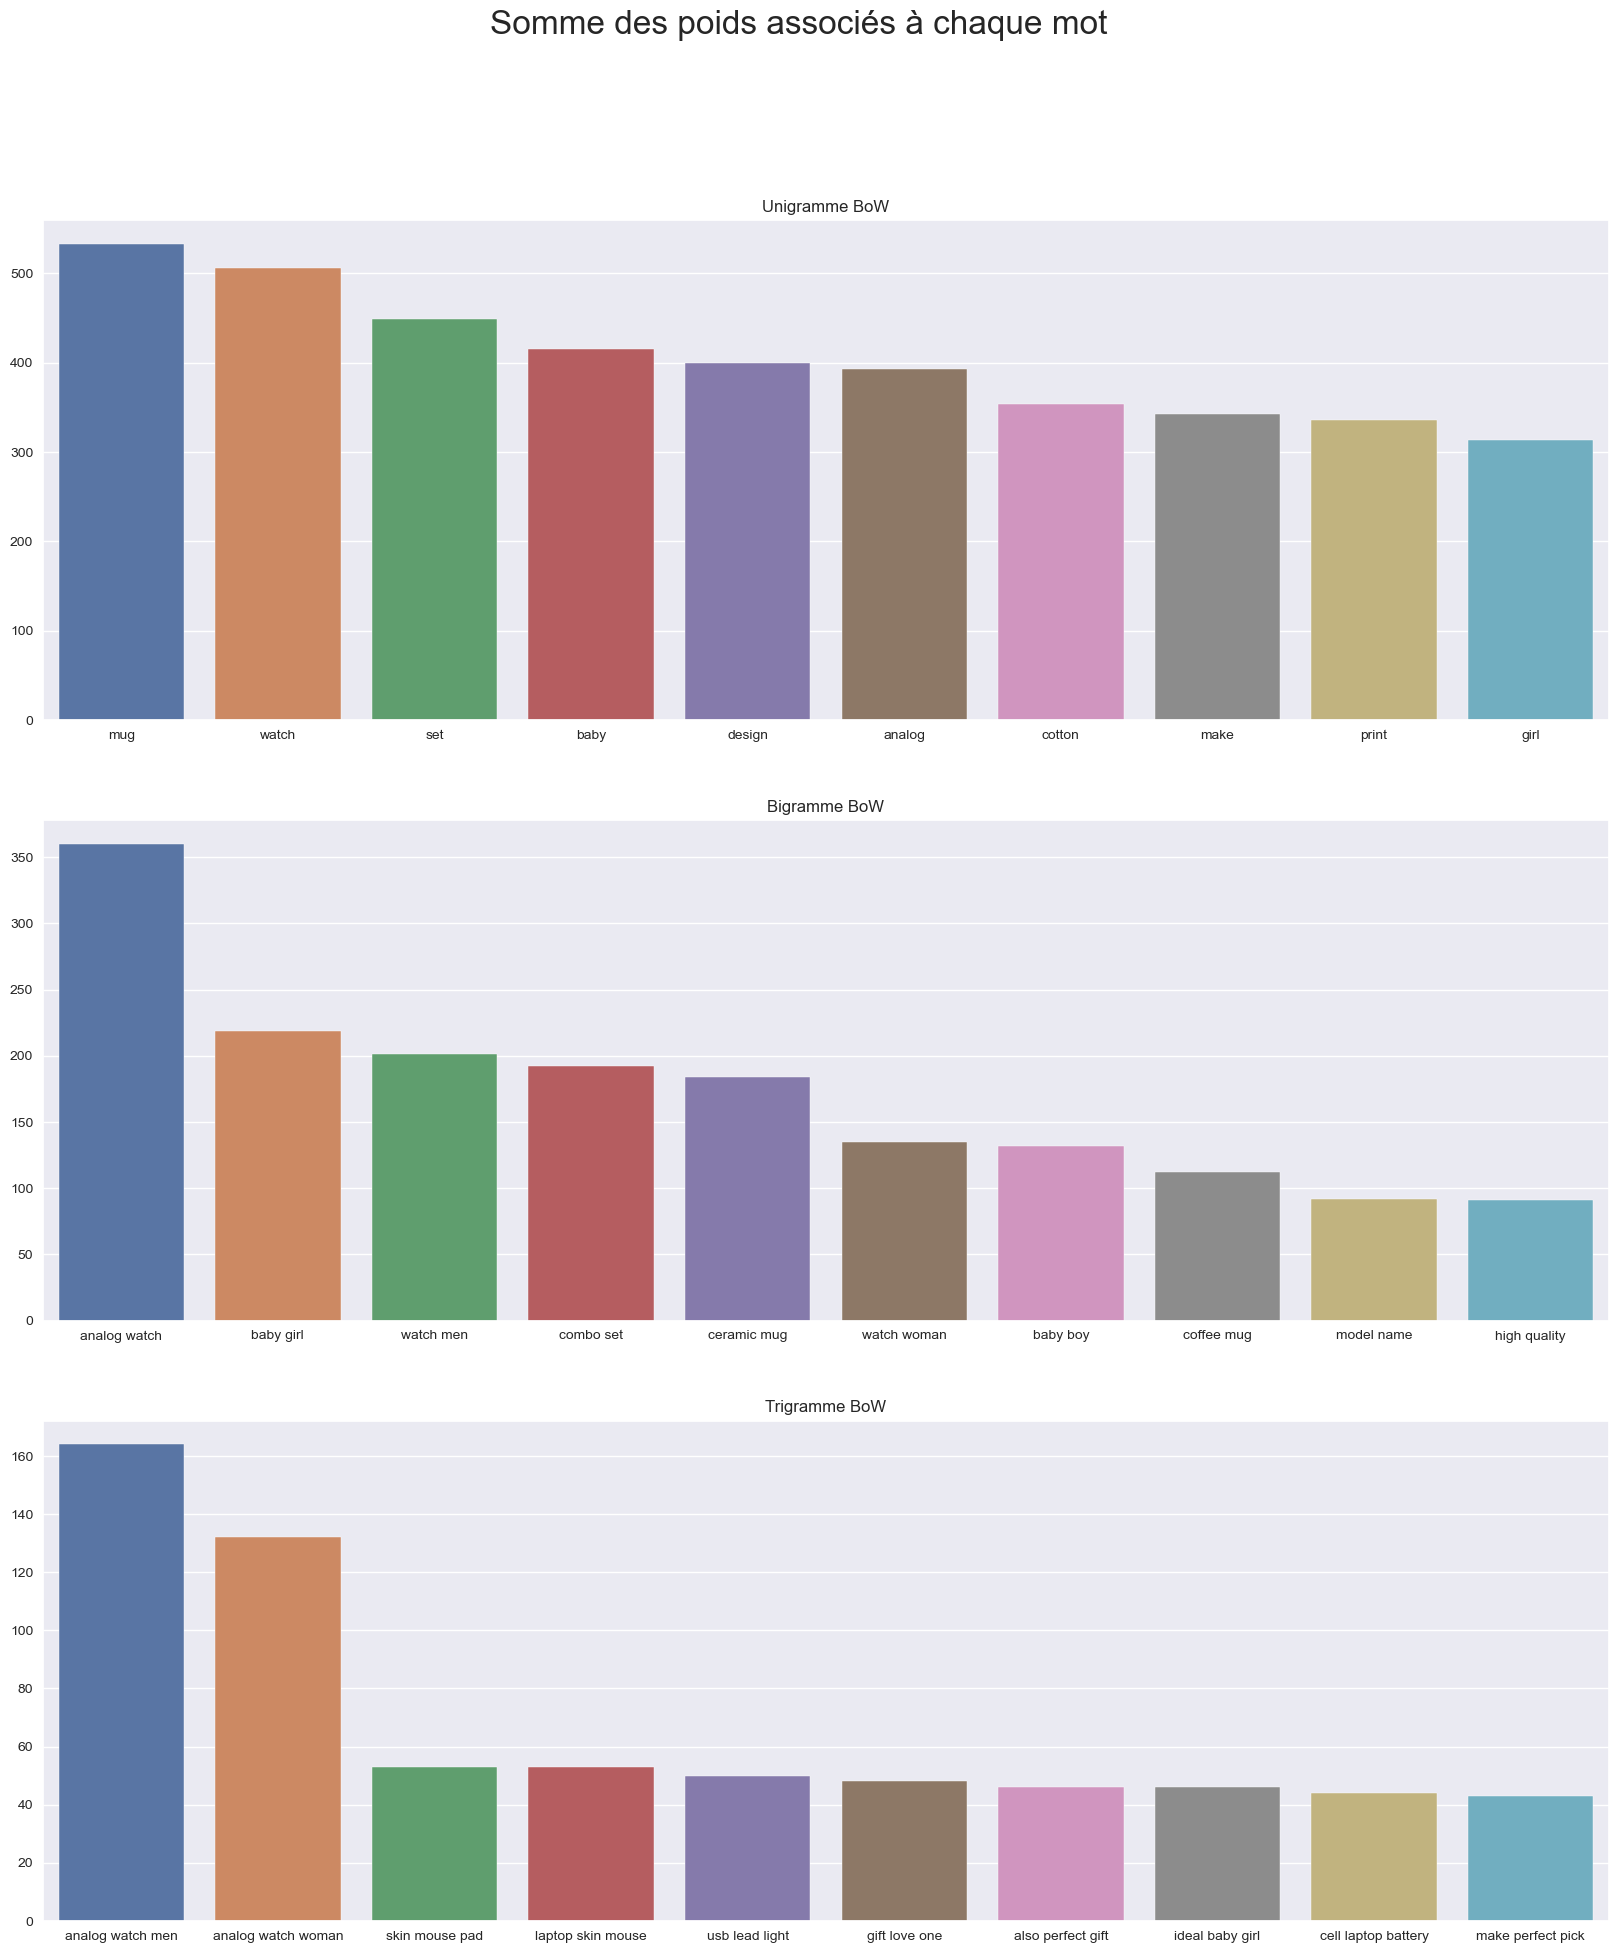

In [62]:
plot_n_gramms(cleaned_desc_and_product_name, CountVectorizer, [(1,1),(2,2),(3,3)], titles=['Unigramme BoW', 'Bigramme BoW', 'Trigramme BoW'])

A partir de 3 mots les associations ne semblent plus pertinents.

---

### Evaluation BoW

Je créé 3 BoWs: Un avec des unigrammes uniquements, un avec des bigrammes uniquement et un avec les 2.

---Unigramme---
0 mots -- (ngramm:(1, 1)) Taille: (1050, 4407), Sparcity: 0.489 %
10 mots -- (ngramm:(1, 1)) Taille: (1050, 513), Sparcity: 2.755 %
20 mots -- (ngramm:(1, 1)) Taille: (1050, 227), Sparcity: 4.621 %
30 mots -- (ngramm:(1, 1)) Taille: (1050, 134), Sparcity: 6.231 %
40 mots -- (ngramm:(1, 1)) Taille: (1050, 91), Sparcity: 7.628 %
50 mots -- (ngramm:(1, 1)) Taille: (1050, 72), Sparcity: 8.526 %
60 mots -- (ngramm:(1, 1)) Taille: (1050, 61), Sparcity: 9.151 %
70 mots -- (ngramm:(1, 1)) Taille: (1050, 50), Sparcity: 9.808 %
80 mots -- (ngramm:(1, 1)) Taille: (1050, 37), Sparcity: 10.770 %
90 mots -- (ngramm:(1, 1)) Taille: (1050, 26), Sparcity: 11.908 %
100 mots -- (ngramm:(1, 1)) Taille: (1050, 20), Sparcity: 12.686 %
110 mots -- (ngramm:(1, 1)) Taille: (1050, 14), Sparcity: 13.898 %
120 mots -- (ngramm:(1, 1)) Taille: (1050, 11), Sparcity: 14.753 %
130 mots -- (ngramm:(1, 1)) Taille: (1050, 10), Sparcity: 15.010 %
140 mots -- (ngramm:(1, 1)) Taille: (1050, 9), Sparcity: 15.

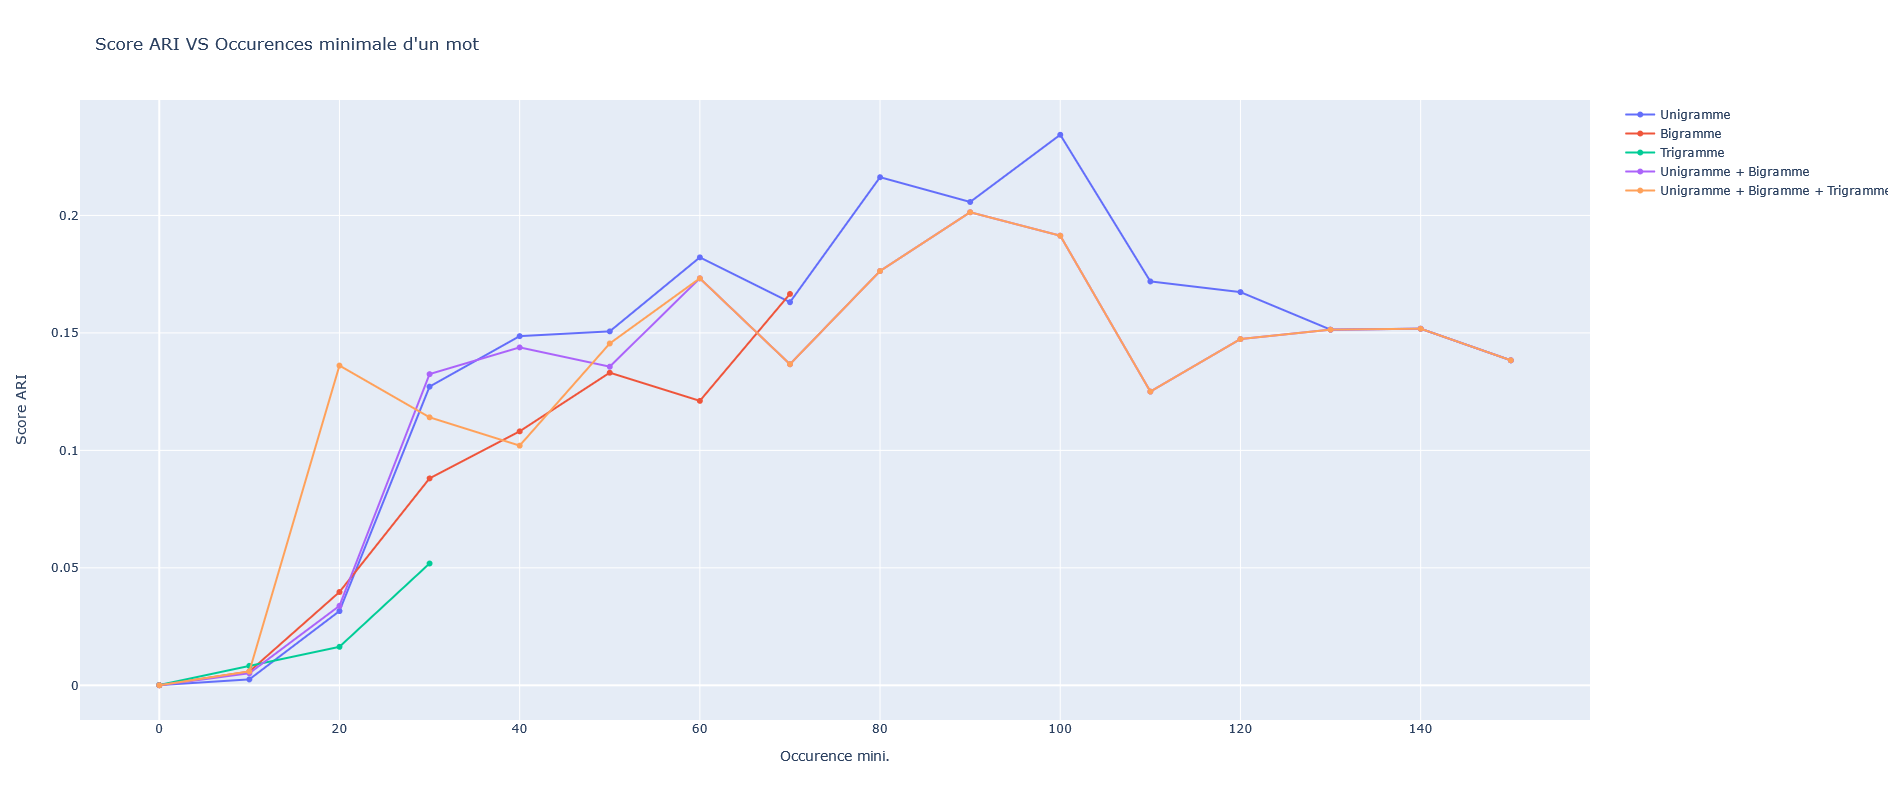

In [63]:
model = KMeans(n_clusters = 7, random_state=42)
vec = CountVectorizer

print('---Unigramme---')
bows, vectorizers = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=True)
print('---Bigramme---')
bows_bi, vectorizers_bi = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=True) 
print('---Trigramme---')
bows_tri, vectorizers_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=True) 
print('---Unigramme + Bigramme---')
bows_both, vectorizers_both = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=True)
print('---Unigramme + Bigramme + Trigramme---')
bows_uni_tri, vectorizers_uni_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=True)

x_range = list(range(0, 160, 10))

plot_all_aris_score([bows, bows_bi, bows_tri, bows_both, bows_uni_tri], true_labels.label, x_value=x_range, model=model, 
                    legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'])

**Unigramme**: A partir de 150 occurences mini, plus de clusters que de mots. <br>
**Bigramme**: A partir de 70 occurences mini. <br>
**Both**: A partir de 150 occurences mini. <br>

Amélioration par rapport à la description seule

Le meilleur jeu d'entrainement est celui composé d'unigramme. <br>
Meilleur ARI score (0,23) atteint avec une occurence de 100 minimum. <br>

#### Analyse des clusters

Le jeu de données retenu est le suivant:

In [109]:
kmeans = KMeans(n_clusters = 7, random_state=42)

bows, vectorizers = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=CountVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=False)

best_bow = bows[10].toarray()
best_vectorizer = vectorizers[10]

# Centrage et Réduction
std_scale = StandardScaler().fit(best_bow)
X_scaled = std_scale.transform(best_bow)

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.23434636338417775

##### T-SNE

In [110]:
from sklearn.manifold import TSNE

In [111]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0     70
1     92
2    528
3     86
4     33
5     85
6    156
dtype: int64

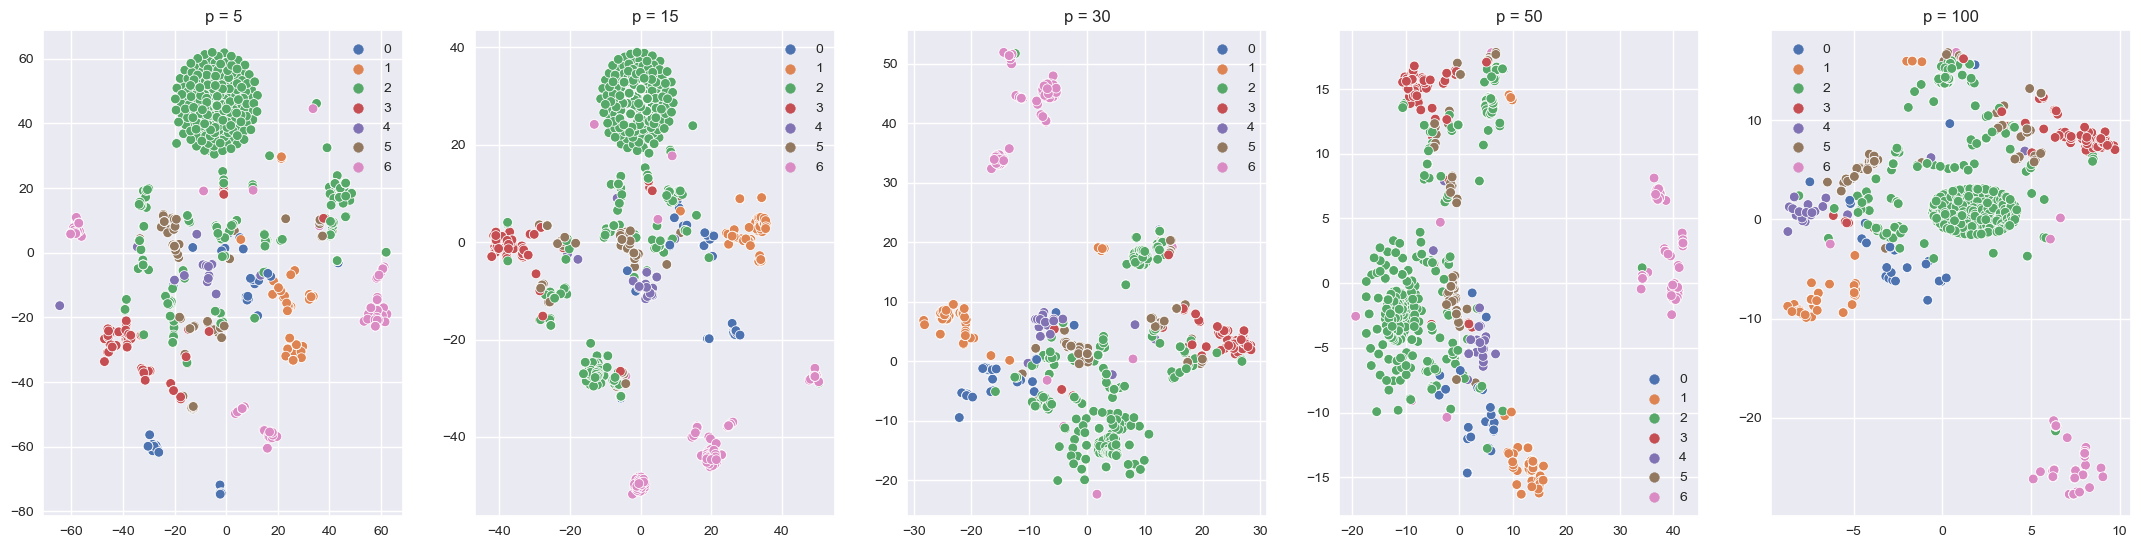

In [112]:
fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_bow)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

## TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Vectorization

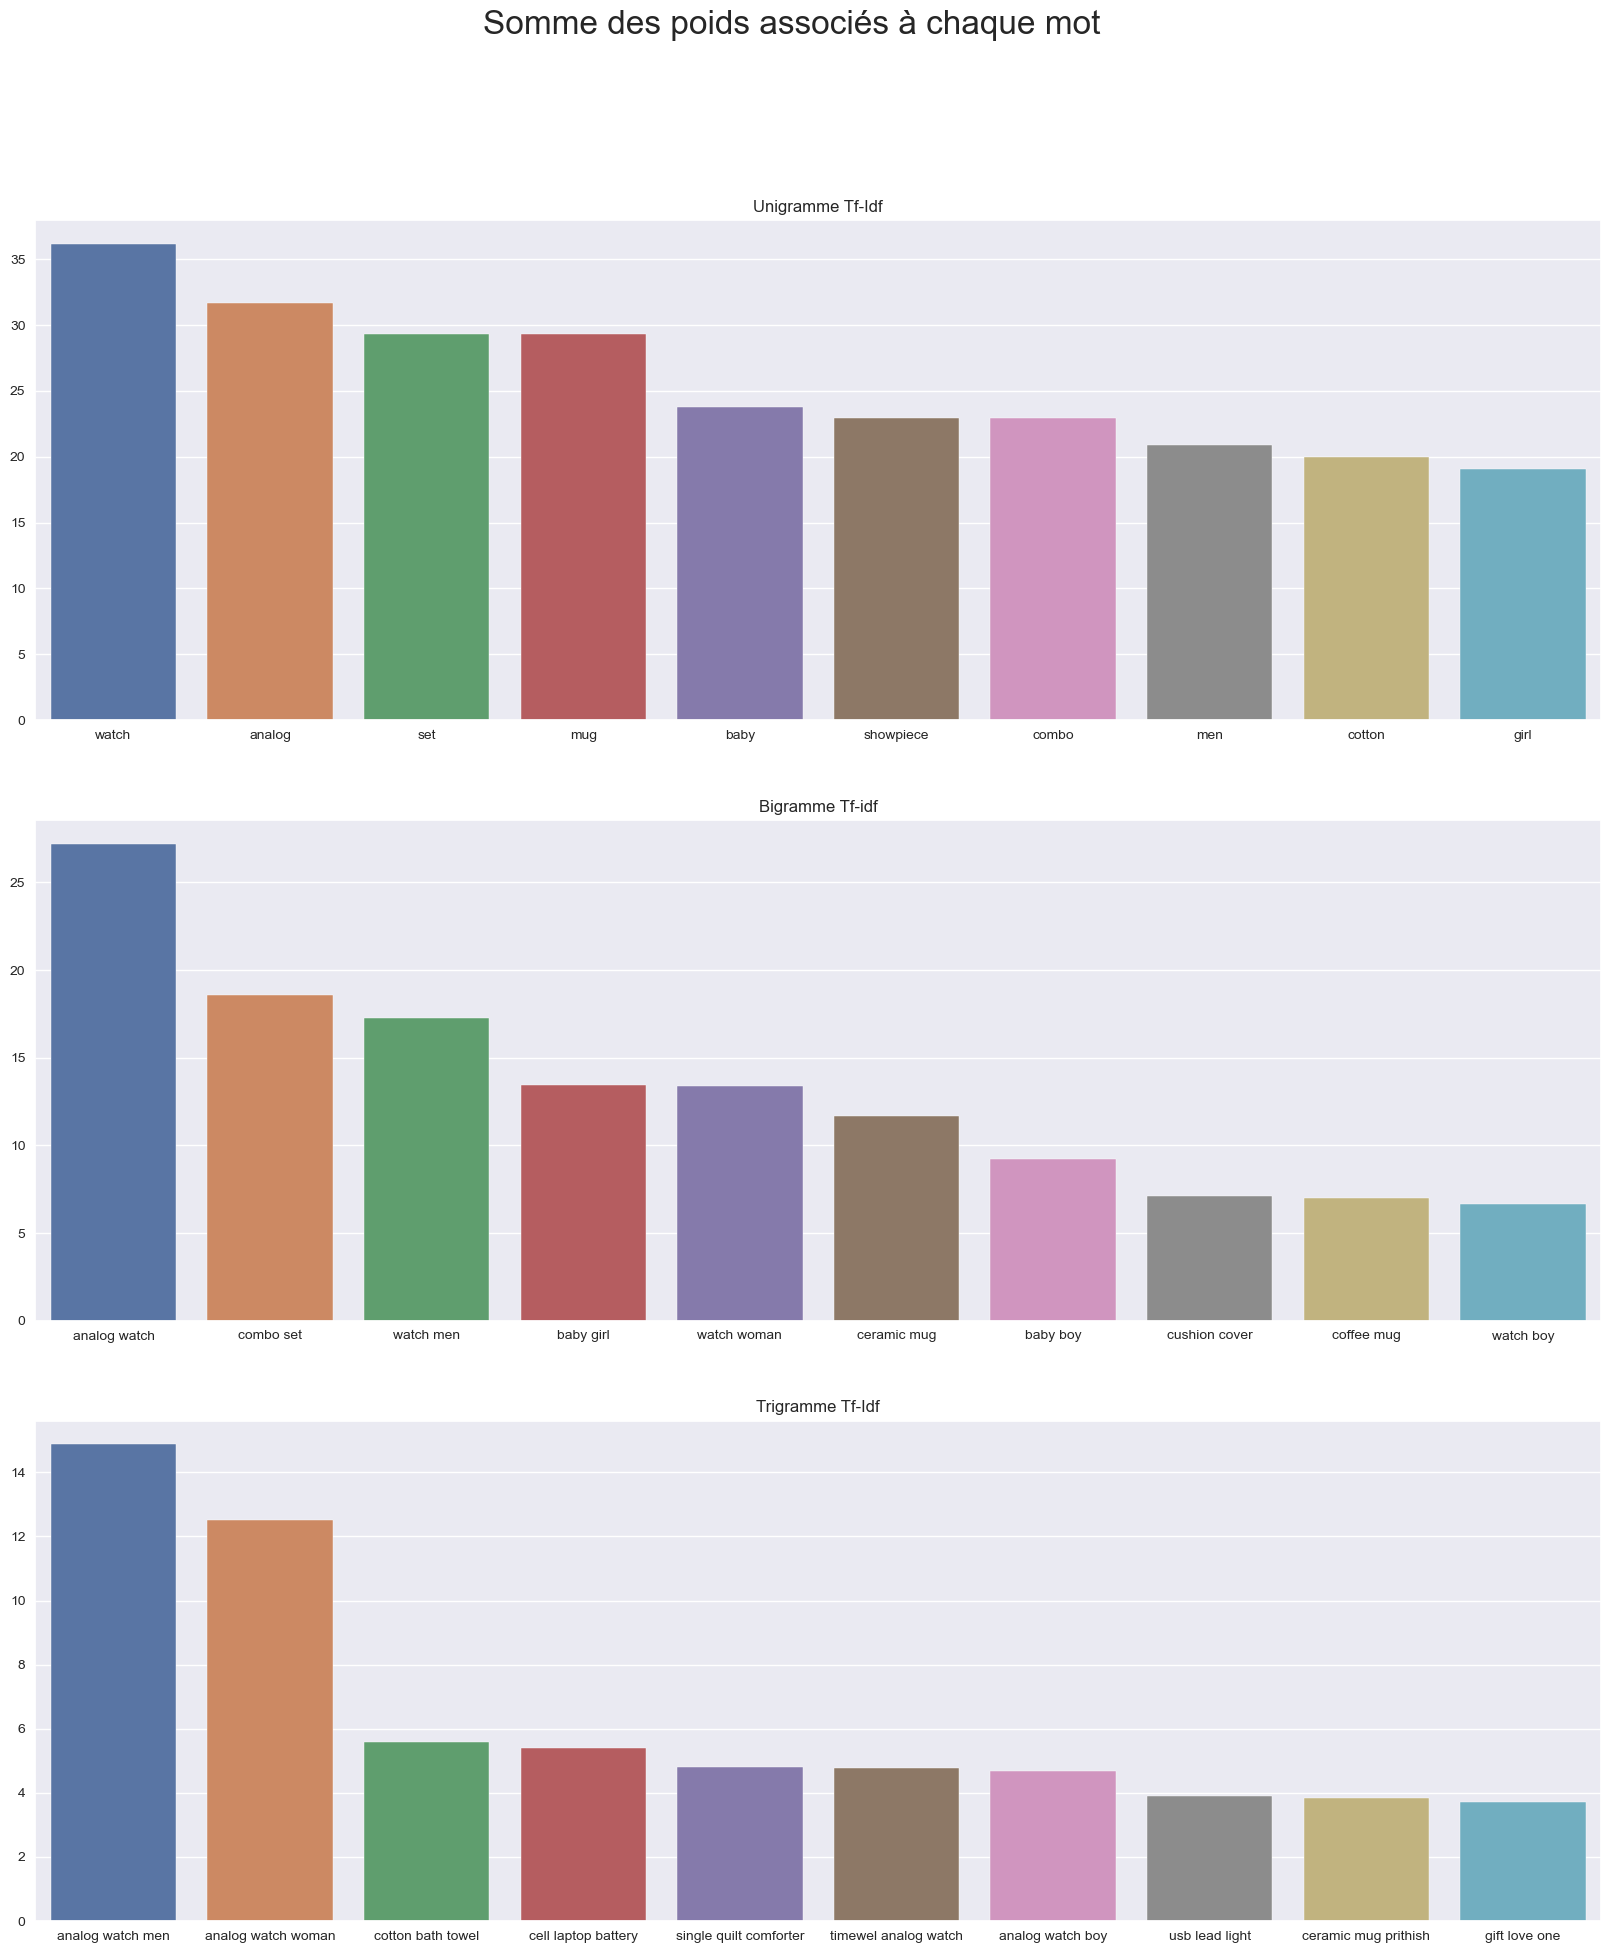

In [69]:
plot_n_gramms(cleaned_desc_and_product_name, TfidfVectorizer, [(1,1),(2,2),(3,3)], titles=['Unigramme Tf-Idf', 'Bigramme Tf-idf', 'Trigramme Tf-Idf'])

---

### Evaluation tf-idf

---Unigramme---
0 mots -- (ngramm:(1, 1)) Taille: (1050, 4407), Sparcity: 0.489 %
10 mots -- (ngramm:(1, 1)) Taille: (1050, 513), Sparcity: 2.755 %
20 mots -- (ngramm:(1, 1)) Taille: (1050, 227), Sparcity: 4.621 %
30 mots -- (ngramm:(1, 1)) Taille: (1050, 134), Sparcity: 6.231 %
40 mots -- (ngramm:(1, 1)) Taille: (1050, 91), Sparcity: 7.628 %
50 mots -- (ngramm:(1, 1)) Taille: (1050, 72), Sparcity: 8.526 %
60 mots -- (ngramm:(1, 1)) Taille: (1050, 61), Sparcity: 9.151 %
70 mots -- (ngramm:(1, 1)) Taille: (1050, 50), Sparcity: 9.808 %
80 mots -- (ngramm:(1, 1)) Taille: (1050, 37), Sparcity: 10.770 %
90 mots -- (ngramm:(1, 1)) Taille: (1050, 26), Sparcity: 11.908 %
100 mots -- (ngramm:(1, 1)) Taille: (1050, 20), Sparcity: 12.686 %
110 mots -- (ngramm:(1, 1)) Taille: (1050, 14), Sparcity: 13.898 %
120 mots -- (ngramm:(1, 1)) Taille: (1050, 11), Sparcity: 14.753 %
130 mots -- (ngramm:(1, 1)) Taille: (1050, 10), Sparcity: 15.010 %
140 mots -- (ngramm:(1, 1)) Taille: (1050, 9), Sparcity: 15.

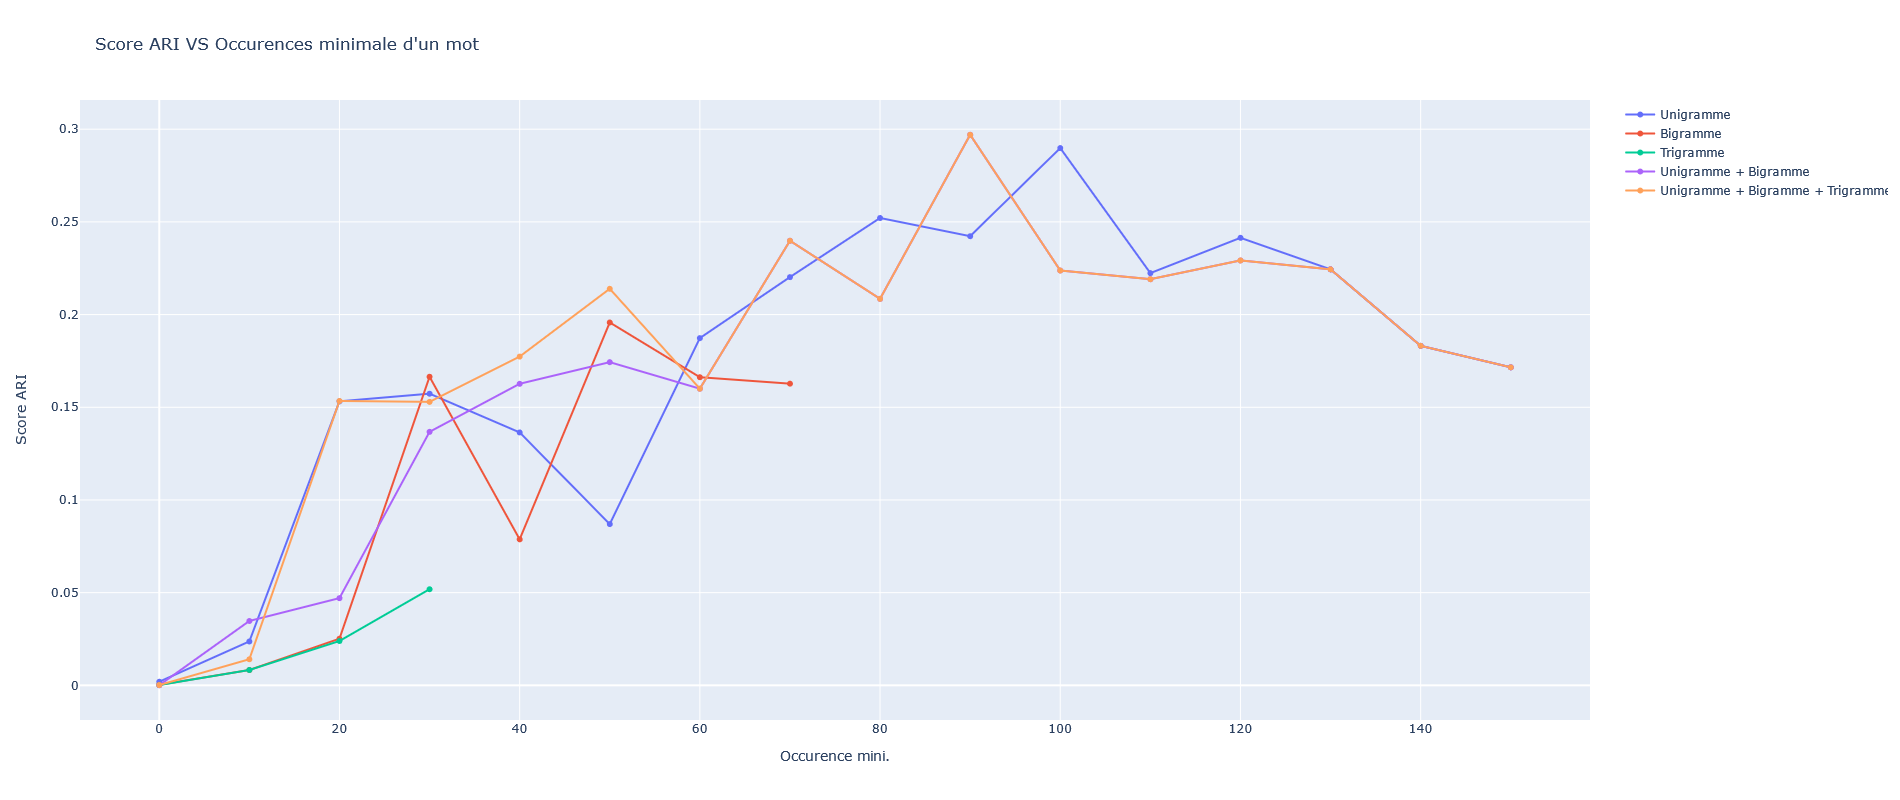

In [70]:
model = KMeans(n_clusters = 7, random_state=42)
vec = TfidfVectorizer

print('---Unigramme---')
tfidf, vectorizers_tfidf = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=True)
print('---Bigramme---')
tfidf_bi, vectorizers_tfidf_bi = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=True) 
print('---Trigramme---')
tfidf_tri, vectorizers_tfidf_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=True) 
print('---Unigramme + Bigramme---')
tfidf_both, vectorizers_tfidf_both = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=True)
print('---Unigramme + Bigramme + Trigramme---')
tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=True)

x_range = list(range(0, 160, 10))

plot_all_aris_score([tfidf, tfidf_bi, tfidf_tri, tfidf_both, tfidf_uni_tri], true_labels.label, x_value=x_range, model=model, 
                    legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'])

Amélioration faible par rapport au dataset sans le nom du produit

Le meilleur jeu d'entrainement est celui composé d'unigramme+bigramme+trigramme. <br>
Meilleur ARI score (0,3) atteint avec une occurence de 90 minimum. <br>

In [114]:
kmeans = KMeans(n_clusters = 7, random_state=42)

tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=TfidfVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=False)

best_tfidf = tfidf_uni_tri[9].toarray()
best_vectorizer_tfidf = vectorizers_tfidf_uni_tri[9]

# Centrage et Réduction
std_scale = StandardScaler().fit(best_tfidf)
X_scaled = std_scale.transform(best_tfidf)

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.2970037152845071

#### T-SNE

In [115]:
from sklearn.manifold import TSNE

In [116]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    127
1     88
2    155
3    107
4     69
5    391
6    113
dtype: int64

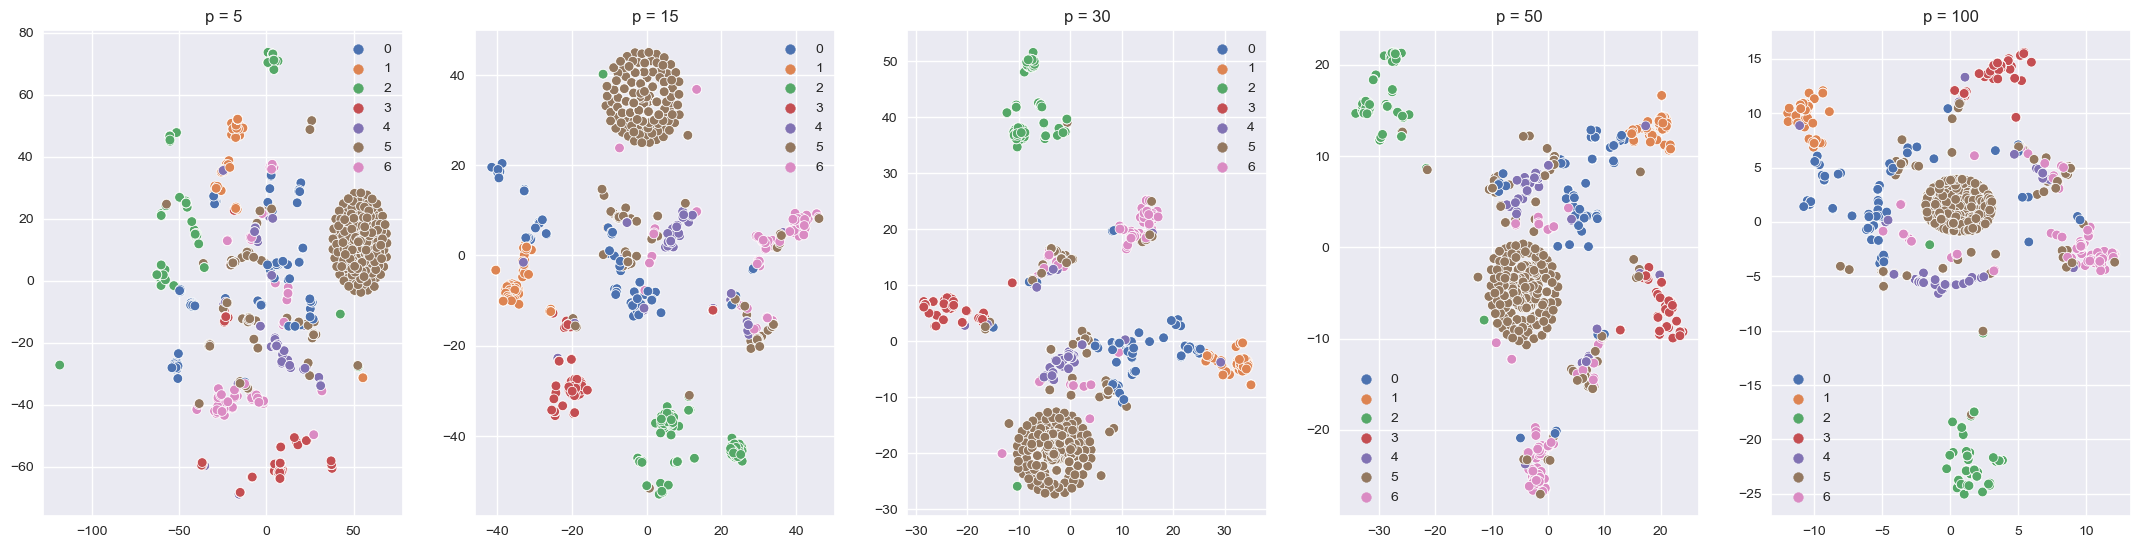

In [117]:
fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_tfidf)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

# K-Means avec description + nom du produit + ACP

Ici on ajoute une étape de réduction de dimension à nos meilleurs datasets obtenus avec chacun des vectorizers

## BoW

Initialement, le meilleur score pour un BoW est de 0.23 et il est obtenu avec 100 occurences mini.

In [45]:
kmeans = KMeans(n_clusters = 7, random_state=42)

bows, vectorizers = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=CountVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=False)

best_bow = bows[10].toarray()
best_vectorizer = vectorizers[10]

# Centrage et Réduction
std_scale = StandardScaler().fit(best_bow)
X_scaled = std_scale.transform(best_bow)

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.23434636338417775

### Réduction de dimension et affiche des nouveaux scores ARIs

---Unigramme---
---Bigramme---
---Trigramme---
---Unigramme + Bigramme---
---Unigramme + Bigramme + Trigramme---
---0.5---


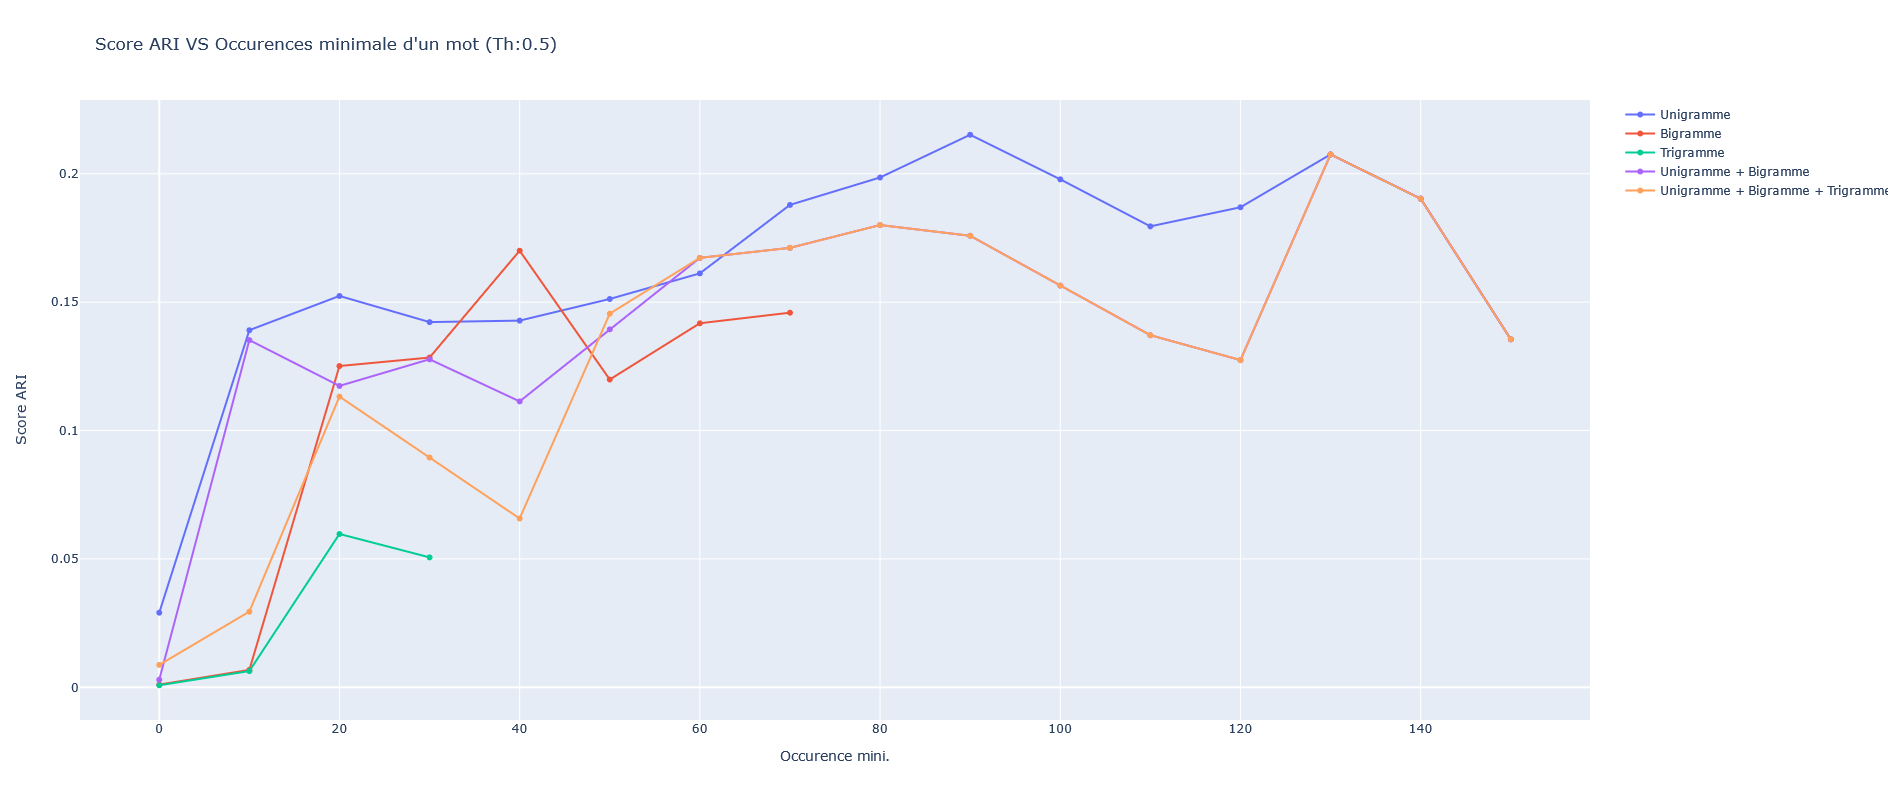

---0.7---


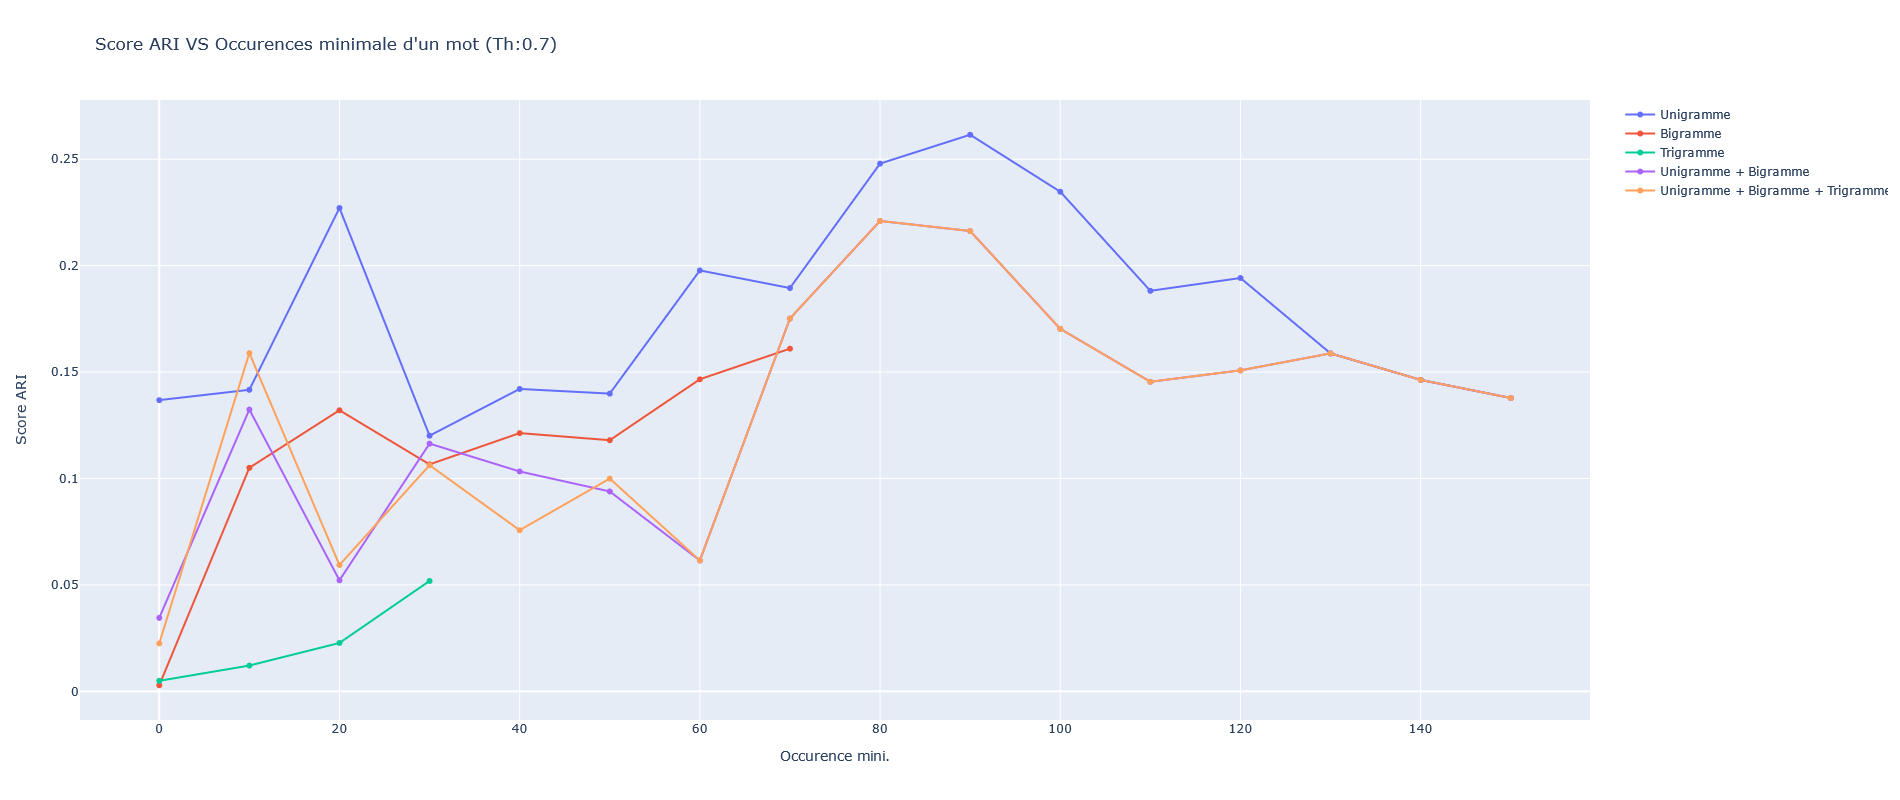

---0.8---


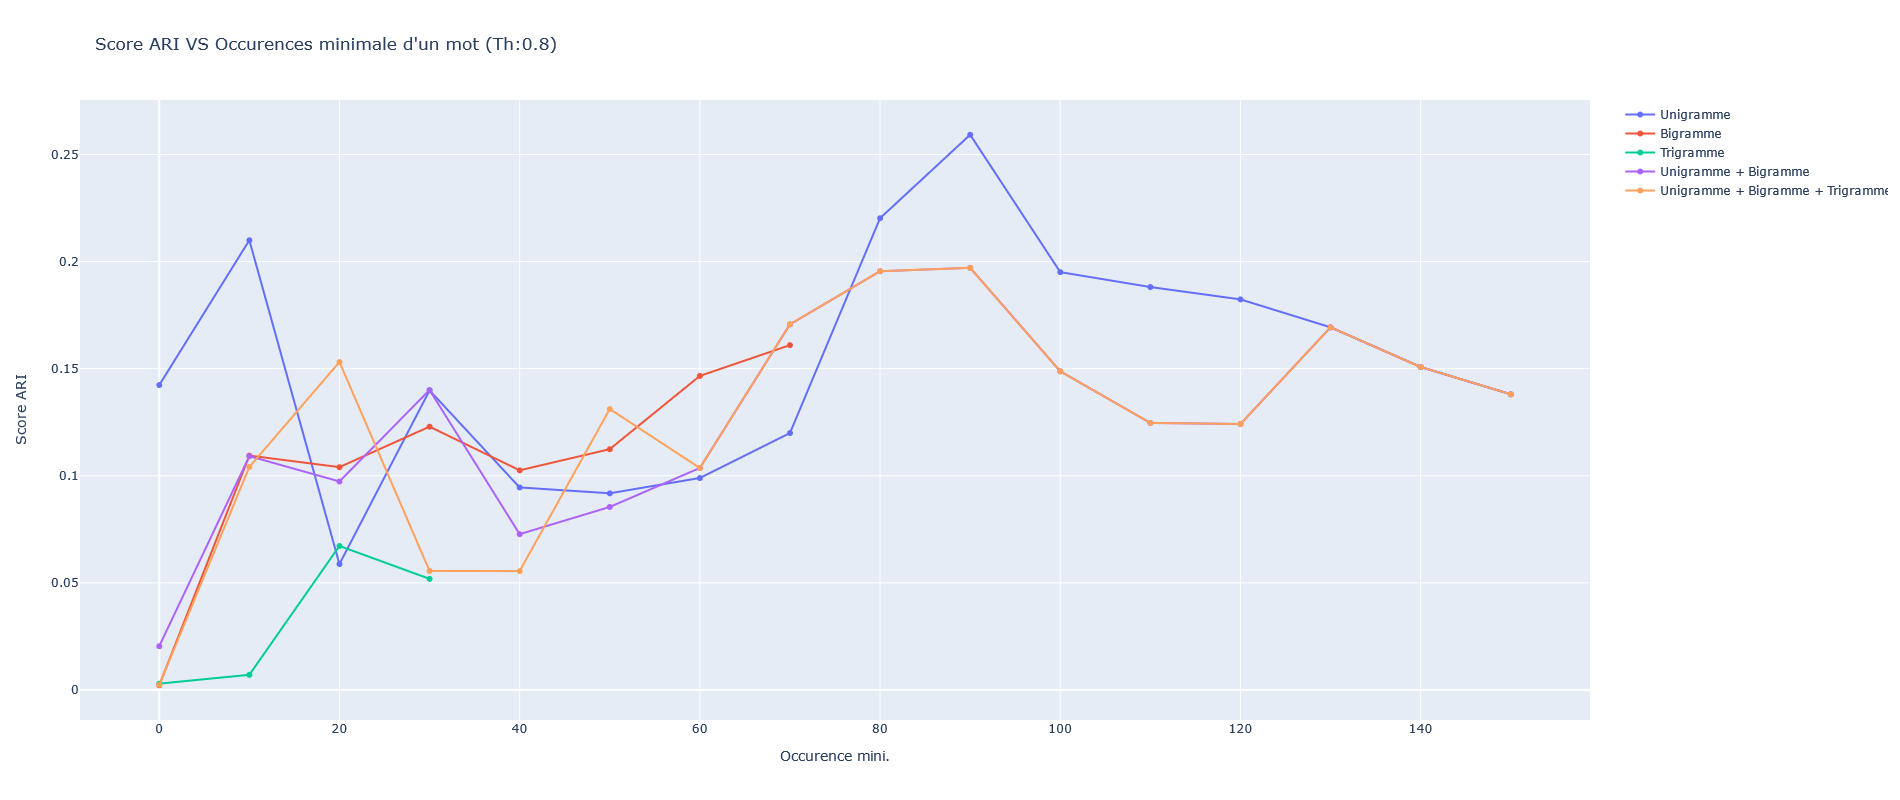

---0.9---


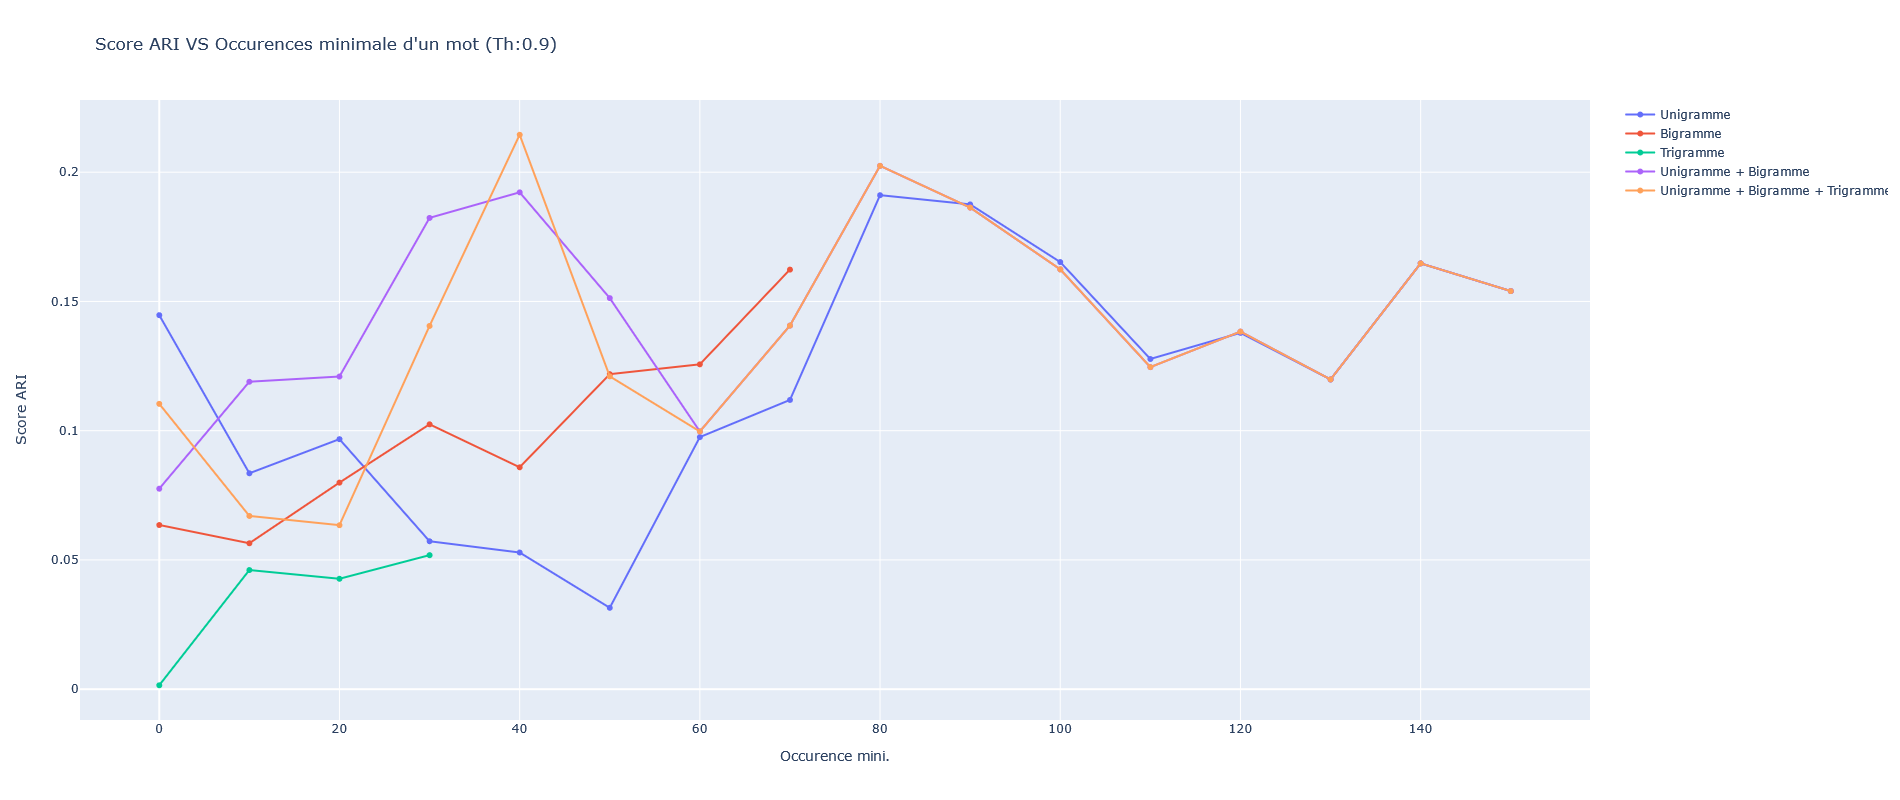

---1---


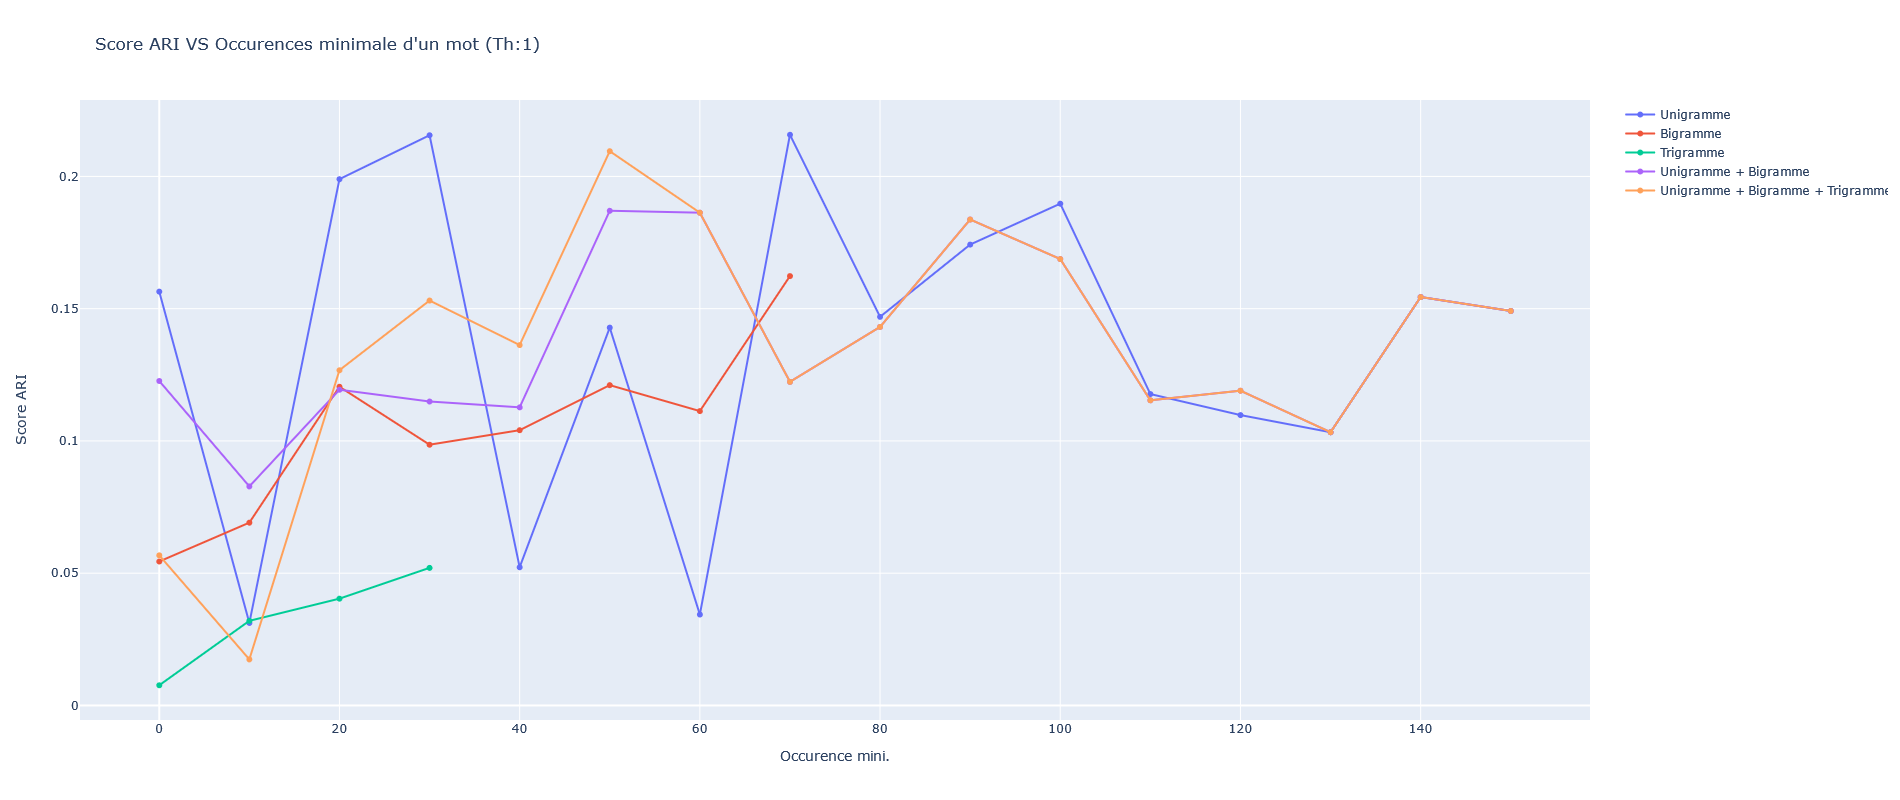

In [140]:
model = KMeans(n_clusters = 7, random_state=42)
vec = CountVectorizer
debug = False

print('---Unigramme---')
bows, vectorizers = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=debug)
print('---Bigramme---')
bows_bi, vectorizers_bi = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=debug)
print('---Trigramme---')
bows_tri, vectorizers_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=debug)
print('---Unigramme + Bigramme---')
bows_both, vectorizers_both = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=debug)
print('---Unigramme + Bigramme + Trigramme---')
bows_uni_tri, vectorizers_uni_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=debug)


# debug = True
for th in [0.5, 0.7, 0.8, 0.9, 1]:
    print(f'---{th}---')
    bows_reduced = reduce_variables_with_pca(bows, th, debug=debug)
    bows_reduced_bi = reduce_variables_with_pca(bows_bi, th, debug=debug)
    bows_reduced_tri = reduce_variables_with_pca(bows_tri, th, debug=debug)
    bows_reduced_both = reduce_variables_with_pca(bows_both, th, debug=debug)
    bows_reduced_uni_tri = reduce_variables_with_pca(bows_uni_tri, th, debug=debug)

    x_range = list(range(0, 160, 10))

    plot_all_aris_score([bows_reduced, bows_reduced_bi, bows_reduced_tri, bows_reduced_both, bows_reduced_uni_tri], true_labels.label, x_value=x_range, model=model, 
                        legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'], title = f'Score ARI VS Occurences minimale d\'un mot (Th:{th})')

### Analyse du meilleur score

Le meilleur score ARI est obtenu avec un BoW d'unigramme, 90 occurences minimale et une ACP avec assez de composants principaux pour expliquer 70% de la variance 

In [46]:
kmeans = KMeans(n_clusters = 7, random_state=42)
debug=False

bows, vectorizers = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=CountVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=debug)
best_bow_reduced = reduce_variables_with_pca([bows[9]], 0.7, debug=debug)[0]

# Centrage et Réduction
std_scale = StandardScaler().fit(best_bow_reduced)
X_scaled = std_scale.transform(best_bow_reduced)

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.2615053038251188

In [47]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0     65
1     53
2    100
3    501
4    149
5    109
6     73
dtype: int64

#### TSNE

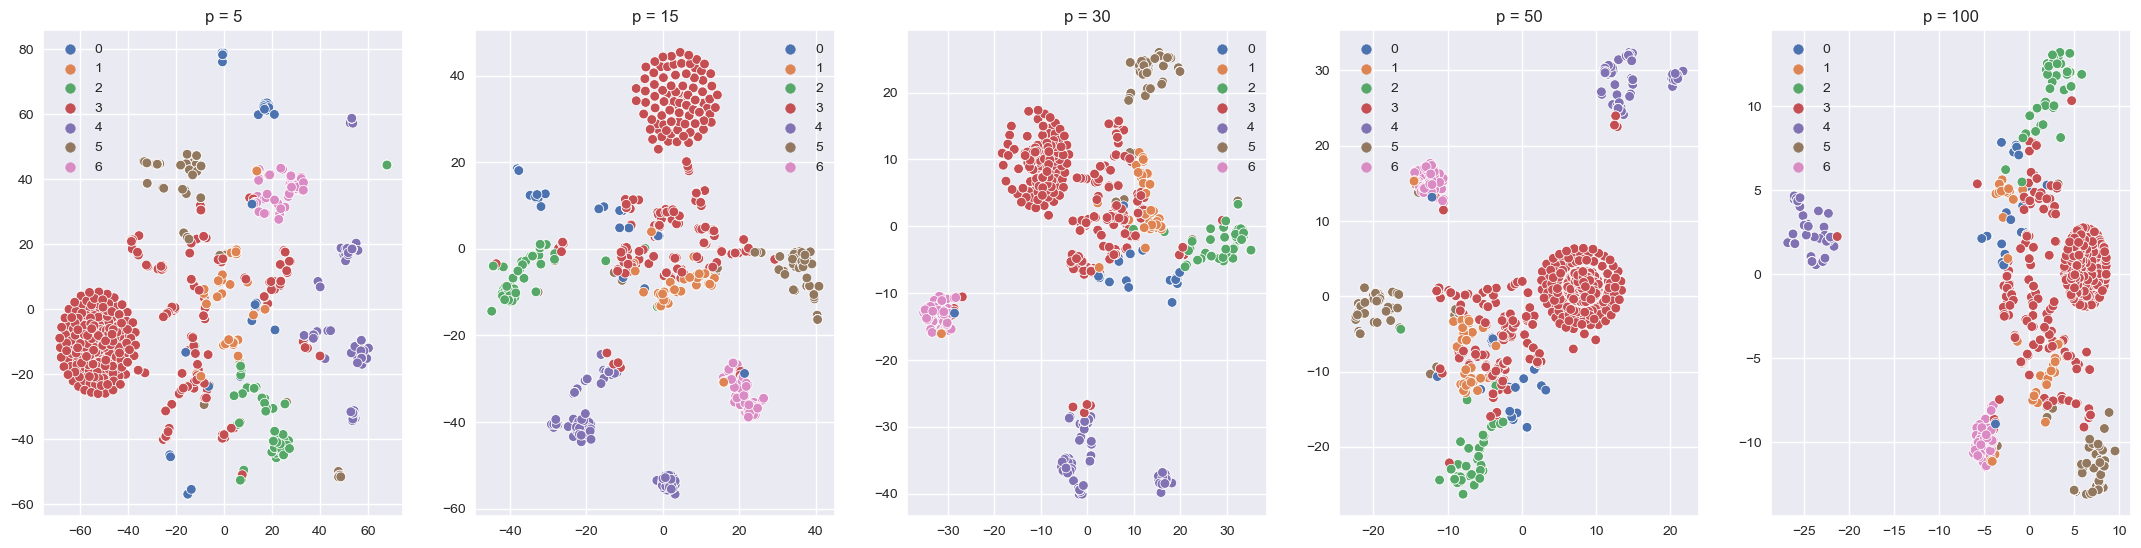

In [143]:
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_bow_reduced)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

## Tf-Idf

Initialement, le meilleur score pour un Tf-Idf d'unigramme+bigramme+trigramme est de 0.3 et il est obtenu avec 100 occurences mini.

In [144]:
kmeans = KMeans(n_clusters = 7, random_state=42)

tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=TfidfVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=False)

best_tfidf = tfidf_uni_tri[9].toarray()
best_vectorizer_tfidf = vectorizers_tfidf_uni_tri[9]

# Centrage et Réduction
std_scale = StandardScaler().fit(best_tfidf)
X_scaled = std_scale.transform(best_tfidf)

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.2970037152845071

### Réduction de dimension et affiche des nouveaux scores ARIs

---Unigramme---
---Bigramme---
---Trigramme---
---Unigramme + Bigramme---
---Unigramme + Bigramme + Trigramme---


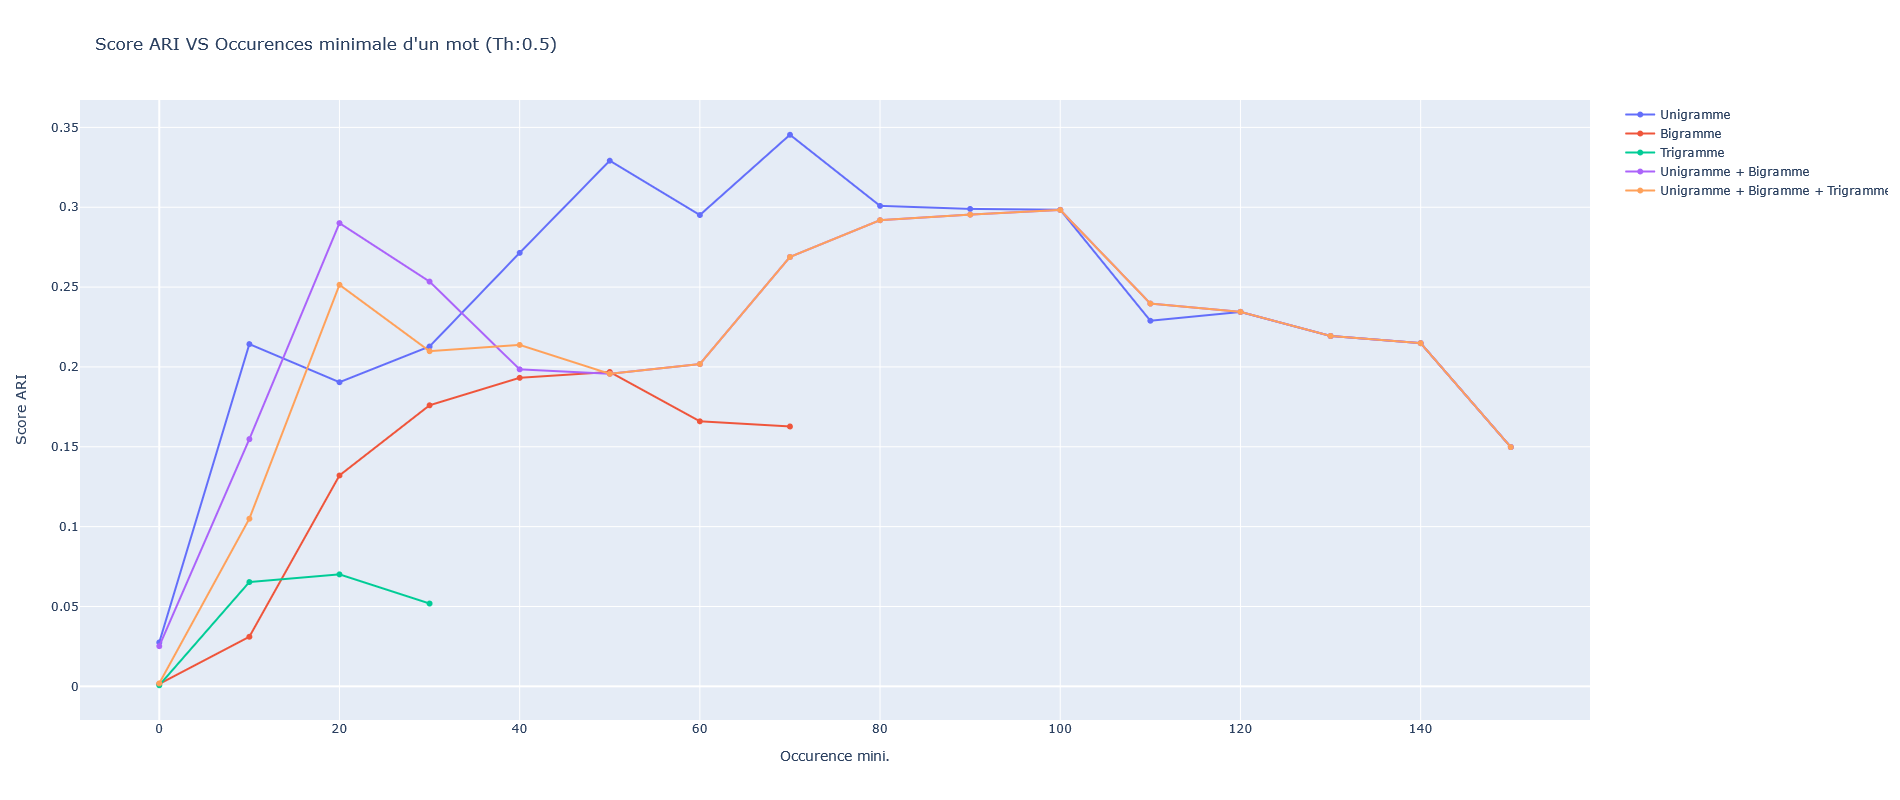

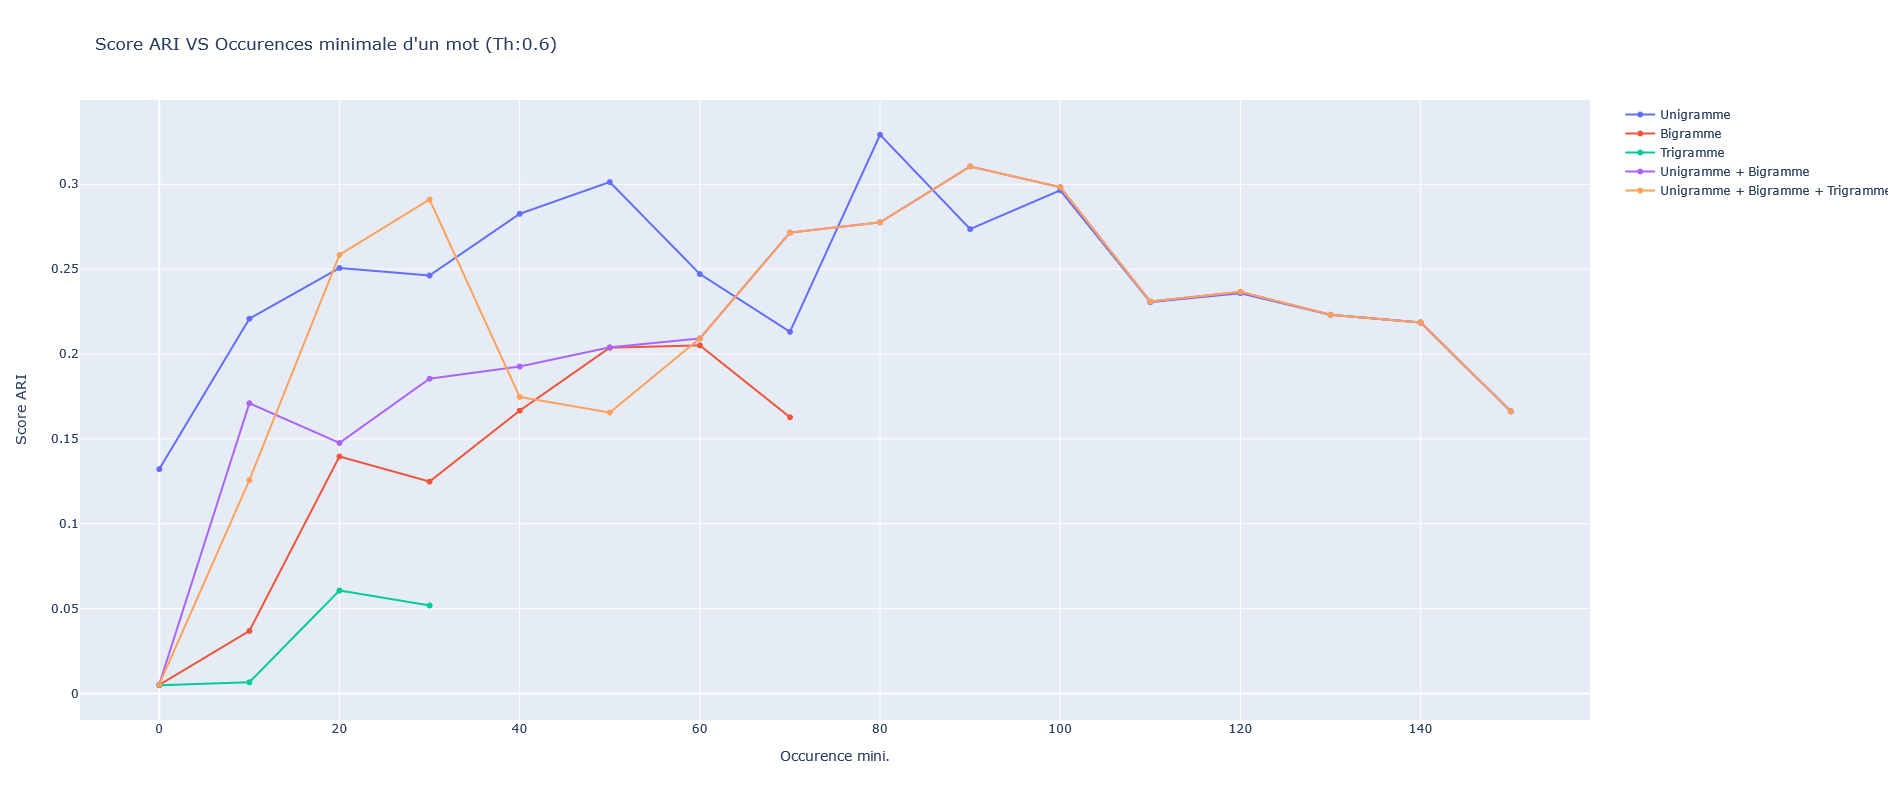

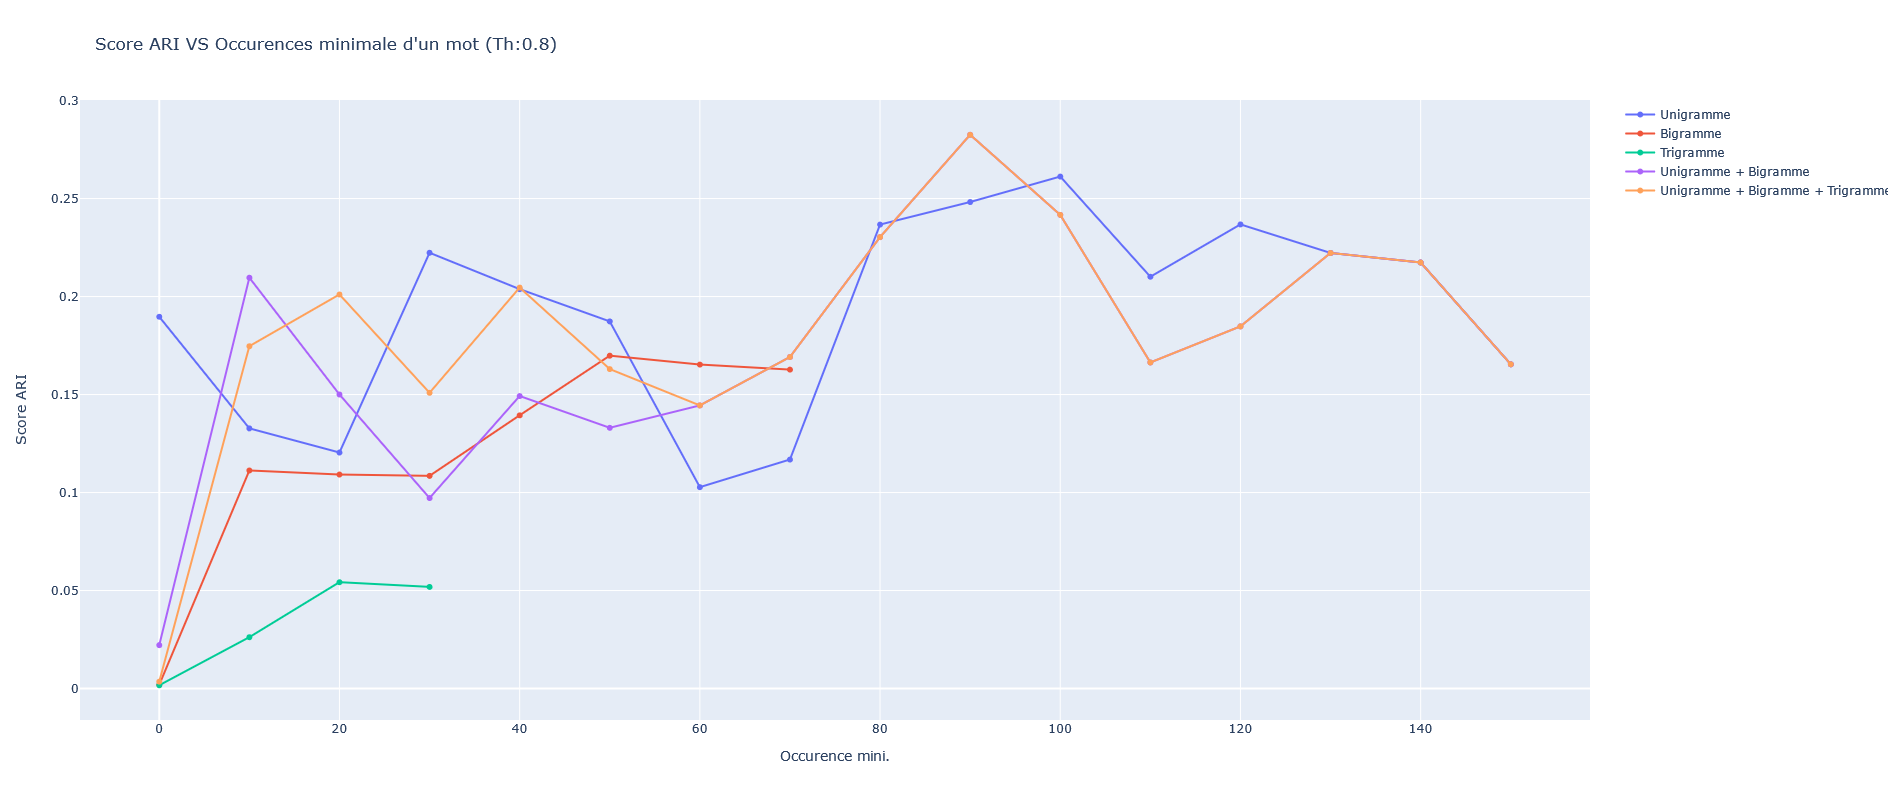

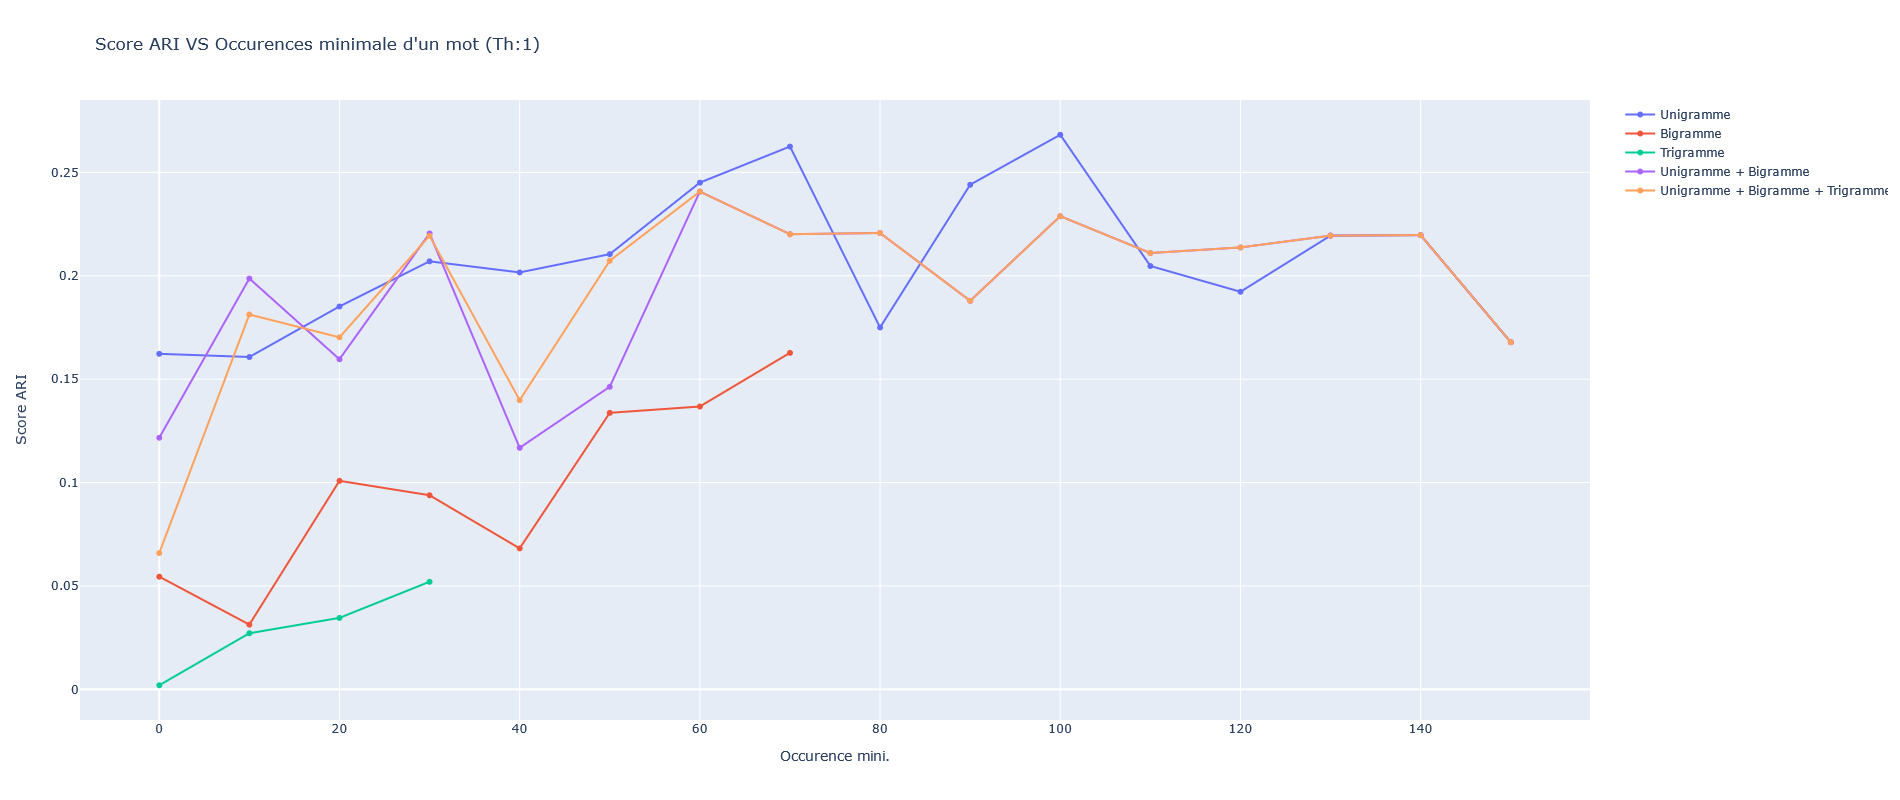

In [152]:
model = KMeans(n_clusters = 7, random_state=42)
vec = TfidfVectorizer
debug = False

print('---Unigramme---')
tfidf, vectorizers_tfidf = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=debug)
print('---Bigramme---')
tfidf_bi, vectorizers_tfidf_bi = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=debug) 
print('---Trigramme---')
tfidf_tri, vectorizers_tfidf_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=debug) 
print('---Unigramme + Bigramme---')
tfidf_both, vectorizers_tfidf_both = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=debug)
print('---Unigramme + Bigramme + Trigramme---')
tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=debug)


debug = False
for th in [0.5, 0.6, 0.8, 1]:
    tfidf_reduced = reduce_variables_with_pca(tfidf, th, debug=debug)
    tfidf_reduced_bi = reduce_variables_with_pca(tfidf_bi, th, debug=debug)
    tfidf_reduced_tri = reduce_variables_with_pca(tfidf_tri, th, debug=debug)
    tfidf_reduced_both = reduce_variables_with_pca(tfidf_both, th, debug=debug)
    tfidf_reduced_uni_tri = reduce_variables_with_pca(tfidf_uni_tri, th, debug=debug)

    x_range = list(range(0, 160, 10))

    plot_all_aris_score([tfidf_reduced, tfidf_reduced_bi, tfidf_reduced_tri, tfidf_reduced_both, tfidf_reduced_uni_tri], true_labels.label, x_value=x_range, model=model, 
                        legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'], title = f'Score ARI VS Occurences minimale d\'un mot (Th:{th})')

### Analyse du meilleur score

Le meilleur score ARI est obtenu avec un Tfidf d'unigramme, 70 occurences minimales et une ACP avec assez de composants principaux pour expliquer 50% de la variance 

In [162]:
kmeans = KMeans(n_clusters = 7, random_state=42)
debug=False

tfidf, _ = vectorized_ngrams(data=cleaned_desc_and_product_name, vec=TfidfVectorizer, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=debug)
best_tfidf_reduced = reduce_variables_with_pca(tfidf, 0.5, debug=debug)

# Centrage et Réduction
std_scale = StandardScaler().fit(best_tfidf_reduced[7])
X_scaled = std_scale.transform(best_tfidf_reduced[7])

kmeans.fit(X_scaled)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.3453914727696585

In [158]:
from sklearn.metrics import accuracy_score

In [156]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    105
1     94
2    150
3    375
4     95
5    156
6     75
dtype: int64

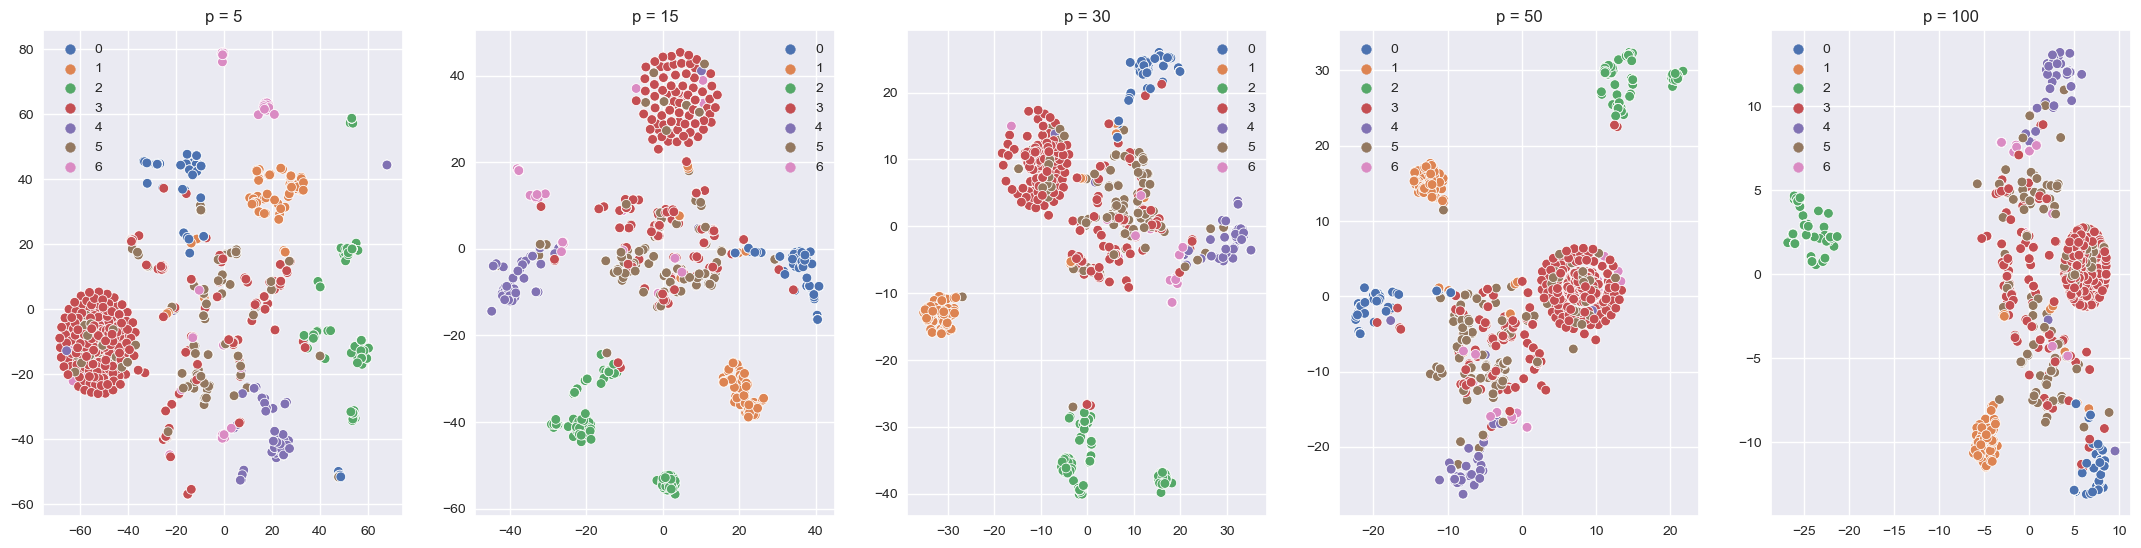

In [157]:
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_bow_reduced)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

# Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import warnings

## Création et nettoyage du dataset

Ici j'utilise uniquement le dataset avec la description et le nom du produit. <br>
Je n'ai pas besoin de faire une ACP car je pourrai gêrer le nombre de variables grâce à l'hyperparamètres 'max_features' de ma forêt aléatoire. <br>

In [30]:
custom_pipeline = [
    {"operator": "lowercase"},
    {"operator": "remove_digits"},
    {"operator": "remove_urls"},
    {"operator": "remove_punctuation"},
    {"operator": "remove_accents"},
    {"operator": "remove_whitespace"},
    {"operator": "remove_html"},
]

In [31]:
# Nouvelle description avec le nom du produit ajouté 
df_desc['description_and_product_name'] = df_desc['product_name'] + ' ' + df_desc['description']

lem = WordNetLemmatizer()

description_and_product_name = clean_text(df_desc, 'description_and_product_name', pipeline=custom_pipeline).description_and_product_name
description_and_product_name = description_and_product_name.apply(func = lambda sentence: " ".join([lem.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words =  ['product', 'free', 'cm', 'buy', 'delivery', 'shipping', 'genuine', 'cash', 'price', 'replacement', 'day', 'flipkart', 'com', 'guarantee', 'feature', 
              'online', 'specification', 'color', 'type', 'material', 'general', 'number', 'brand', 'best', 'key', 'size', 'dimension', 'sale', 'discount', 'pack', 'package', 'box']

stop_words = stop_words.union(new_words)

cleaned_desc_and_product_name = description_and_product_name.apply(func=lambda x: remove_stopwords(x, stop_words))

In [32]:
df_cleaned_desc_product = pd.DataFrame(data=cleaned_desc_and_product_name)
df_cleaned_desc_product['label'] = main_categories
df_cleaned_desc_product.sample(5)

description_and_product_name  \
769  xemex stsl new generation analog watch woman xemex stsl new generation analog watch woman xemex ...   
410        asus rp n dual band wireless n range extender asus rp n dual band wireless n range extender r   
681  cocovey metal photo frame cocovey metal photo frame photo photo r add traditional stylish look h...   
348                                                                zyxel g data card zyxel g data card r   
485  lapguard lenovo ideapad v cell laptop battery lapguard lenovo ideapad v cell laptop battery r co...   

         label  
769    watches  
410  computers  
681  baby care  
348  computers  
485  computers

In [33]:
train, test = train_test_split(df_cleaned_desc_product, test_size=0.2, stratify=df_cleaned_desc_product.label, random_state=42)

test.label.value_counts()

home furnishing                 30
home decor and festive needs    30
baby care                       30
watches                         30
computers                       30
beauty and personal care        30
kitchen and dining              30
Name: label, dtype: int64

## Baseline

In [34]:
from sklearn.dummy import DummyClassifier

In [35]:
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(train.description_and_product_name, train.label)

dummy.score(test.description_and_product_name, test.label)

0.1380952380952381

## BoW

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

Je ne calcule pas tous les n-grammes envisageables, je choisis de construire un BoW avec Unigramme, Bigramme et Trigramme. <br>
La sélection des bonnes features se fera grâce à la forêt.

### Evaluation

In [92]:
vec = CountVectorizer
debug = False

bows_uni_tri, vectorizers_uni_tri = vectorized_ngrams(data=train.description_and_product_name, vec=vec, min_words=list(range(0,140,10)), ngram=(1, 3), debug=True)

0 occurences -- (ngramm:(1, 3)) Taille: (840, 34607), Sparcity: 0.219 %
10 occurences -- (ngramm:(1, 3)) Taille: (840, 713), Sparcity: 2.705 %
20 occurences -- (ngramm:(1, 3)) Taille: (840, 237), Sparcity: 4.964 %
30 occurences -- (ngramm:(1, 3)) Taille: (840, 127), Sparcity: 6.857 %
40 occurences -- (ngramm:(1, 3)) Taille: (840, 90), Sparcity: 8.011 %
50 occurences -- (ngramm:(1, 3)) Taille: (840, 69), Sparcity: 8.911 %
60 occurences -- (ngramm:(1, 3)) Taille: (840, 50), Sparcity: 9.905 %
70 occurences -- (ngramm:(1, 3)) Taille: (840, 31), Sparcity: 11.348 %
80 occurences -- (ngramm:(1, 3)) Taille: (840, 20), Sparcity: 12.696 %
90 occurences -- (ngramm:(1, 3)) Taille: (840, 15), Sparcity: 13.627 %
100 occurences -- (ngramm:(1, 3)) Taille: (840, 12), Sparcity: 14.296 %
110 occurences -- (ngramm:(1, 3)) Taille: (840, 9), Sparcity: 14.894 %
120 occurences -- (ngramm:(1, 3)) Taille: (840, 6), Sparcity: 15.496 %
130 occurences -- (ngramm:(1, 3)) Taille: (840, 4), Sparcity: 15.923 %


Pour éviter des problèmes liés au fléau de la dimension, je choisis arbitrairement de conserver les mots avec 30 occurences mini

In [40]:
X_train = pd.DataFrame(data=bows_uni_tri[3].toarray(), columns=vectorizers_uni_tri[3].get_feature_names())
y_train = train.label

In [47]:
%%time

warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'n_estimators': np.arange(1, 600, 1), # Nombre d'arbres dans notre forêt
    'max_leaf_nodes': np.arange(1, 600, 1), # Le nombre max de feuilles par arbres
    'max_depth': np.arange(1, 200, 1), # La profondeur maximale d'un arbre
    'max_features' : list(range(5,131,5)), # Le nombre de features à regarder pour construire un arbre
    }

model_param_search_bow = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid,
                                 n_jobs=-1, cv=5, n_iter=300, return_train_score=True)

model_param_search_bow.fit(X_train,y_train)

Wall time: 2min 36s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75...
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572,
       573, 574, 575, 576, 577, 578, 579, 580, 581

In [49]:
cv_results =  pd.DataFrame(model_param_search_bow.cv_results_)
cv_results[['mean_test_score', 'mean_train_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(10)

mean_test_score  mean_train_score  \
222         0.861905          0.922321   
9           0.861905          0.933929   
32          0.860714          0.933929   
164         0.860714          0.933929   
277         0.860714          0.933929   
216         0.859524          0.920238   
187         0.859524          0.933333   
211         0.859524          0.933929   
113         0.859524          0.932440   
229         0.859524          0.933929   

                                                                                 params  
222   {'n_estimators': 488, 'max_leaf_nodes': 55, 'max_features': 30, 'max_depth': 118}  
9     {'n_estimators': 333, 'max_leaf_nodes': 513, 'max_features': 5, 'max_depth': 148}  
32    {'n_estimators': 334, 'max_leaf_nodes': 589, 'max_features': 5, 'max_depth': 190}  
164    {'n_estimators': 390, 'max_leaf_nodes': 580, 'max_features': 5, 'max_depth': 63}  
277   {'n_estimators': 295, 'max_leaf_nodes': 466, 'max_features': 5, 'max_depth': 104}  
216   {'n_estimators': 150, 'max_leaf_nodes': 53, 'max_features': 25, 'max_depth': 188}  
187   {'n_estimators': 530, 'max_leaf_nodes': 116, 'max_features': 5, 'max_depth': 162}  
211   {'n_estimators': 554, 'max_leaf_nodes': 299, 'max_features': 5, 'max_depth': 175}  
113   {'n_estimators': 379, 'max_leaf_nodes': 588, 'max_features': 20, 'max_depth': 30}  
229  {'n_estimators': 531, 'max_leaf_nodes': 492, 'max_features': 10, 'max_depth': 106}

In [52]:
%%time

warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'n_estimators': [450, 470, 490, 510, 530], # Nombre d'arbres dans notre forêt
    'max_leaf_nodes': [45, 50, 55, 60, 65], # Le nombre max de feuilles par arbres
    'max_depth': [100, 110, 120, 130, 140], # La profondeur maximale d'un arbre
    'max_features' : [25, 30, 35, 40, 45], # Le nombre de features à regarder pour construire un arbre
    }

model_grid_search_bow = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                                 n_jobs=-1, cv=5, return_train_score=True)

model_grid_search_bow.fit(X_train, y_train)

Wall time: 7min 38s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [100, 110, 120, 130, 140],
                         'max_features': [25, 30, 35, 40, 45],
                         'max_leaf_nodes': [45, 50, 55, 60, 65],
                         'n_estimators': [450, 470, 490, 510, 530]},
             return_train_score=True)

In [57]:
cv_results =  pd.DataFrame(model_grid_search_bow.cv_results_)
cv_results[['mean_test_score', 'mean_train_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(10)

mean_test_score  mean_train_score  \
412         0.861905          0.922321   
413         0.861905          0.922321   
163         0.861905          0.922321   
162         0.861905          0.922321   
35          0.861905          0.922321   
160         0.861905          0.922321   
37          0.861905          0.922321   
38          0.861905          0.922321   
538         0.861905          0.922321   
537         0.861905          0.922321   

                                                                                params  
412  {'max_depth': 130, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 490}  
413  {'max_depth': 130, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 510}  
163  {'max_depth': 110, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 510}  
162  {'max_depth': 110, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 490}  
35   {'max_depth': 100, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 450}  
160  {'max_depth': 110, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 450}  
37   {'max_depth': 100, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 490}  
38   {'max_depth': 100, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 510}  
538  {'max_depth': 140, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 510}  
537  {'max_depth': 140, 'max_features': 30, 'max_leaf_nodes': 55, 'n_estimators': 490}

### Test

In [131]:
bows_uni_tri_test = CountVectorizer(vocabulary=vectorizers_uni_tri[3].get_feature_names()).transform(test.description_and_product_name) # On compte dans notre test-set les fréquences des mots trouvés dans le train-set 
X_test = pd.DataFrame(data=bows_uni_tri_test.toarray(), columns=vectorizers_uni_tri[3].get_feature_names()) 
y_test = test.label.reset_index(drop=True)

In [132]:
best_rf_bow = model_grid_search_bow.best_estimator_
best_score = best_rf_bow.score(X_test, y_test)

print(f'Meilleur modèle {best_score*100:.1f}% d\'accuracy: \n{best_rf_bow}')

Meilleur modèle 81.9% d'accuracy: 
RandomForestClassifier(max_depth=100, max_features=30, max_leaf_nodes=55,
                       n_estimators=450, random_state=42)


### Analyse du résultat

#### Mots les plus déterminants

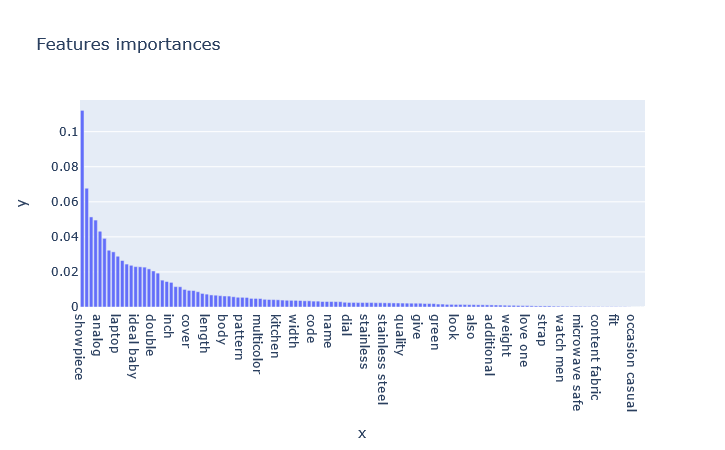

In [133]:
feature_importances = pd.Series(best_rf_bow.feature_importances_,
                                index = X_train.columns.tolist(),
                                name='Feature importance')\
                                .sort_values(ascending=False)

px.bar(data_frame=feature_importances, y=feature_importances.values, x=list(feature_importances.index), title='Features importances')

#### New heading

#### Catégories les mieux/moins biens prédites

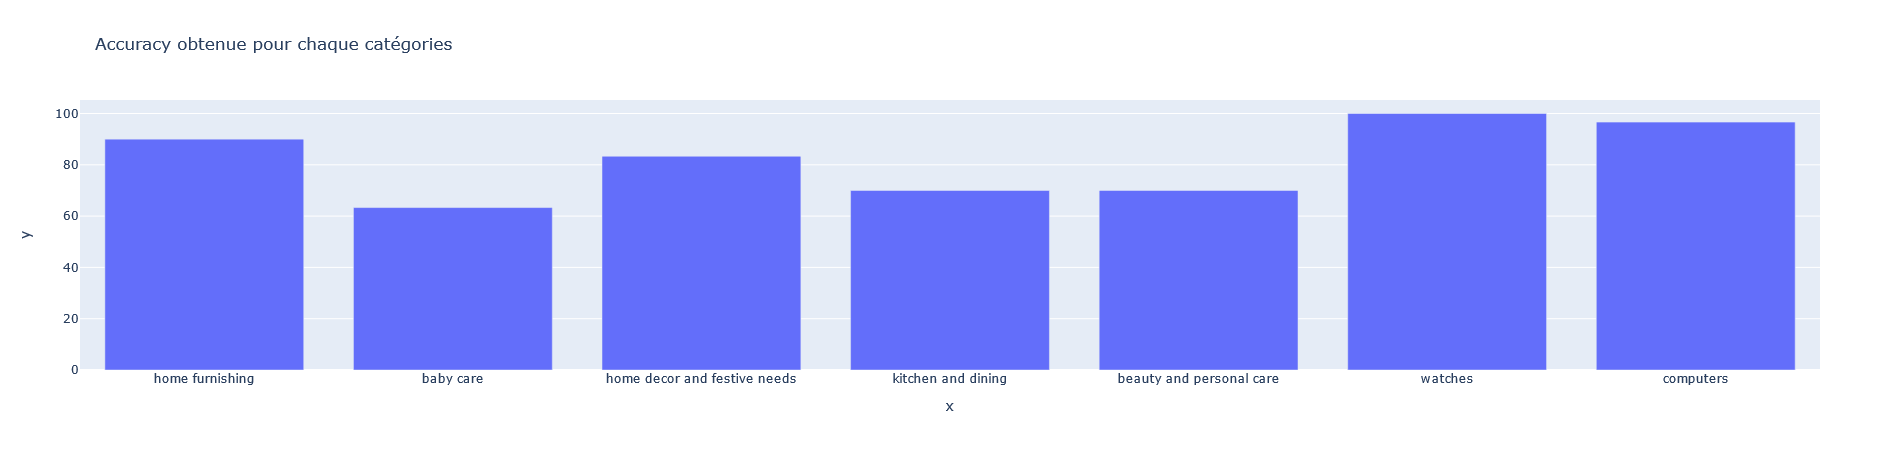

In [142]:
score_categ = []

for categ in set(main_categories):
    score = best_rf_bow.score(X_test.iloc[y_test[y_test == categ].index], y_test[y_test == categ])
#     print(f'{categ}: {score*100:.1f}%')
    score_categ.append(score*100)


px.bar(x=list(set(main_categories)), y=score_categ, title='Accuracy obtenue pour chaque catégories')

## Tf-Idf

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Evaluation

In [39]:
vec = TfidfVectorizer
debug = False

tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=train.description_and_product_name, vec=vec, min_words=list(range(0,140,10)), ngram=(1, 3), debug=True)

0 occurences -- (ngramm:(1, 3)) Taille: (840, 34607), Sparcity: 0.219 %
10 occurences -- (ngramm:(1, 3)) Taille: (840, 713), Sparcity: 2.705 %
20 occurences -- (ngramm:(1, 3)) Taille: (840, 237), Sparcity: 4.964 %
30 occurences -- (ngramm:(1, 3)) Taille: (840, 127), Sparcity: 6.857 %
40 occurences -- (ngramm:(1, 3)) Taille: (840, 90), Sparcity: 8.011 %
50 occurences -- (ngramm:(1, 3)) Taille: (840, 69), Sparcity: 8.911 %
60 occurences -- (ngramm:(1, 3)) Taille: (840, 50), Sparcity: 9.905 %
70 occurences -- (ngramm:(1, 3)) Taille: (840, 31), Sparcity: 11.348 %
80 occurences -- (ngramm:(1, 3)) Taille: (840, 20), Sparcity: 12.696 %
90 occurences -- (ngramm:(1, 3)) Taille: (840, 15), Sparcity: 13.627 %
100 occurences -- (ngramm:(1, 3)) Taille: (840, 12), Sparcity: 14.296 %
110 occurences -- (ngramm:(1, 3)) Taille: (840, 9), Sparcity: 14.894 %
120 occurences -- (ngramm:(1, 3)) Taille: (840, 6), Sparcity: 15.496 %
130 occurences -- (ngramm:(1, 3)) Taille: (840, 4), Sparcity: 15.923 %


Pour éviter des problèmes liés au fléau de la dimension, je choisis arbitrairement de conserver les mots avec 10 occurences mini. <br>
Je choisis une valeur plus faible qu'avec mon BoW car ici les mots avec peu d'occurences ne vont pas avoir un poids aussi important. <br>

In [59]:
X_train = pd.DataFrame(data=tfidf_uni_tri[1].toarray(), columns=vectorizers_tfidf_uni_tri[1].get_feature_names())
y_train = train.label

In [60]:
%%time

warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'n_estimators': np.arange(1, 600, 1), # Nombre d'arbres dans notre forêt
    'max_leaf_nodes': np.arange(1, 600, 1), # Le nombre max de feuilles par arbres
    'max_depth': np.arange(1, 200, 1), # La profondeur maximale d'un arbre
    'max_features' : list(range(20,131,5)), # Le nombre de features à regarder pour construire un arbre
    }

model_param_search_tfidf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid,
                                 n_jobs=-1, cv=5, n_iter=200, return_train_score=True)

model_param_search_tfidf.fit(X_train,y_train)

Wall time: 2min 31s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75...
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572,
       573, 574, 575, 576, 577, 578, 579, 580, 581

In [61]:
cv_results =  pd.DataFrame(model_param_search_tfidf.cv_results_)
cv_results[['mean_test_score', 'mean_train_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(10)

mean_test_score  mean_train_score  \
128         0.919048          0.986607   
42          0.919048          0.986607   
63          0.917857          0.986607   
199         0.916667          0.975595   
40          0.916667          0.980357   
74          0.916667          0.986607   
77          0.916667          0.986607   
94          0.916667          0.986607   
45          0.916667          0.986607   
173         0.916667          0.986607   

                                                                                 params  
128  {'n_estimators': 366, 'max_leaf_nodes': 599, 'max_features': 65, 'max_depth': 107}  
42   {'n_estimators': 190, 'max_leaf_nodes': 437, 'max_features': 65, 'max_depth': 115}  
63   {'n_estimators': 424, 'max_leaf_nodes': 410, 'max_features': 65, 'max_depth': 116}  
199    {'n_estimators': 449, 'max_leaf_nodes': 66, 'max_features': 65, 'max_depth': 64}  
40    {'n_estimators': 192, 'max_leaf_nodes': 372, 'max_features': 60, 'max_depth': 45}  
74   {'n_estimators': 286, 'max_leaf_nodes': 165, 'max_features': 60, 'max_depth': 133}  
77   {'n_estimators': 260, 'max_leaf_nodes': 141, 'max_features': 20, 'max_depth': 190}  
94   {'n_estimators': 167, 'max_leaf_nodes': 230, 'max_features': 95, 'max_depth': 172}  
45   {'n_estimators': 471, 'max_leaf_nodes': 495, 'max_features': 65, 'max_depth': 159}  
173  {'n_estimators': 253, 'max_leaf_nodes': 211, 'max_features': 20, 'max_depth': 182}

In [62]:
%%time

warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'n_estimators': [170, 180, 190, 200, 210], # Nombre d'arbres dans notre forêt
    'max_leaf_nodes': [410, 420, 430, 440, 450], # Le nombre max de feuilles par arbres
    'max_depth': [90, 100, 110, 120, 130], # La profondeur maximale d'un arbre
    'max_features' : [50, 55, 60, 65, 70, 75], # Le nombre de features à regarder pour construire un arbre
    }

model_grid_search_tfidf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                                 n_jobs=-1, cv=5, return_train_score=True)

model_grid_search_tfidf.fit(X_train, y_train)

Wall time: 5min 57s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [90, 100, 110, 120, 130],
                         'max_features': [50, 55, 60, 65, 70, 75],
                         'max_leaf_nodes': [410, 420, 430, 440, 450],
                         'n_estimators': [170, 180, 190, 200, 210]},
             return_train_score=True)

In [63]:
cv_results =  pd.DataFrame(model_grid_search_tfidf.cv_results_)
cv_results[['mean_test_score', 'mean_train_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(10)

mean_test_score  mean_train_score  \
375         0.919048          0.986607   
97          0.919048          0.986607   
95          0.919048          0.986607   
94          0.919048          0.986607   
245         0.919048          0.986607   
92          0.919048          0.986607   
90          0.919048          0.986607   
89          0.919048          0.986607   
247         0.919048          0.986607   
87          0.919048          0.986607   

                                                                                 params  
375  {'max_depth': 110, 'max_features': 65, 'max_leaf_nodes': 410, 'n_estimators': 170}  
97    {'max_depth': 90, 'max_features': 65, 'max_leaf_nodes': 450, 'n_estimators': 190}  
95    {'max_depth': 90, 'max_features': 65, 'max_leaf_nodes': 450, 'n_estimators': 170}  
94    {'max_depth': 90, 'max_features': 65, 'max_leaf_nodes': 440, 'n_estimators': 210}  
245  {'max_depth': 100, 'max_features': 65, 'max_leaf_nodes': 450, 'n_estimators': 170}  
92    {'max_depth': 90, 'max_features': 65, 'max_leaf_nodes': 440, 'n_estimators': 190}  
90    {'max_depth': 90, 'max_features': 65, 'max_leaf_nodes': 440, 'n_estimators': 170}  
89    {'max_depth': 90, 'max_features': 65, 'max_leaf_nodes': 430, 'n_estimators': 210}  
247  {'max_depth': 100, 'max_features': 65, 'max_leaf_nodes': 450, 'n_estimators': 190}  
87    {'max_depth': 90, 'max_features': 65, 'max_leaf_nodes': 430, 'n_estimators': 190}

### Test

In [66]:
tfidf_uni_tri_test = CountVectorizer(vocabulary=vectorizers_tfidf_uni_tri[1].get_feature_names()).transform(test.description_and_product_name) # On compte dans notre test-set les fréquences des mots trouvés dans le train-set 
X_test = pd.DataFrame(data=tfidf_uni_tri_test.toarray(), columns=vectorizers_tfidf_uni_tri[1].get_feature_names()) 
y_test = test.label.reset_index(drop=True)

In [67]:
best_rf_tfidf = model_grid_search_tfidf.best_estimator_
best_score = best_rf_tfidf.score(X_test, y_test)

print(f'Meilleur modèle {best_score*100:.1f}% d\'accuracy: \n{best_rf_tfidf}')

Meilleur modèle 85.2% d'accuracy: 
RandomForestClassifier(max_depth=90, max_features=65, max_leaf_nodes=410,
                       n_estimators=170, random_state=42)


### Analyse du résultat

#### Mots les plus déterminants

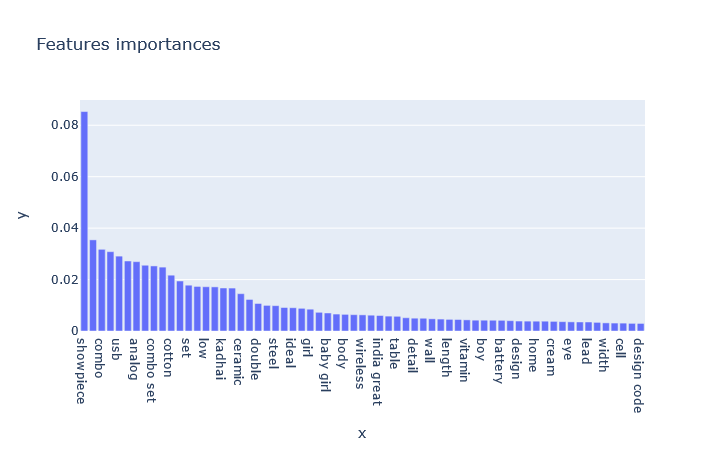

In [70]:
feature_importances = pd.Series(best_rf_tfidf.feature_importances_,
                                index = X_train.columns.tolist(),
                                name='Feature importance')\
                                .sort_values(ascending=False).head(65)

px.bar(data_frame=feature_importances, y=feature_importances.values, x=list(feature_importances.index), title='Features importances')

#### Catégories les mieux/moins biens prédites

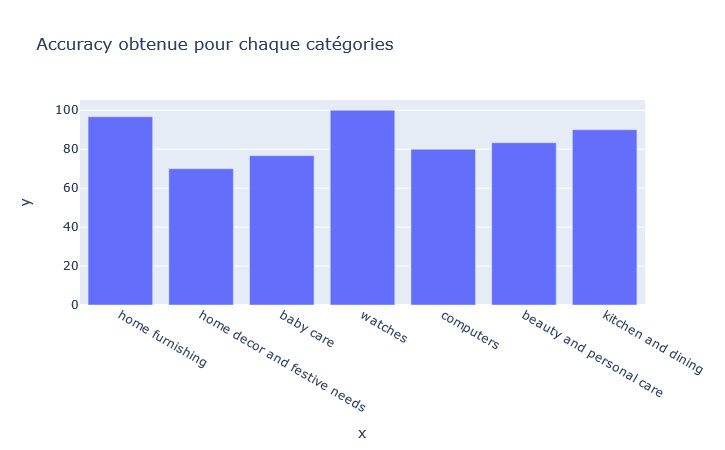

In [71]:
score_categ = []

for categ in set(main_categories):
    score = best_rf_tfidf.score(X_test.iloc[y_test[y_test == categ].index], y_test[y_test == categ])
#     print(f'{categ}: {score*100:.1f}%')
    score_categ.append(score*100)


px.bar(x=list(set(main_categories)), y=score_categ, title='Accuracy obtenue pour chaque catégories')